# **<center>Predicting Daegu Apartment Sale Prices<center>**
___

### **Contents:** 
1. Business Problem
2. Data Understanding and Cleaning
3. Exploratory Data Analysis
5. Feature Engineering
6. Modeling and Evaluation
1. Final Model Interpretation
8. Conclusion and Recommendation
7. Deployment

## **1. Business Problem**
---

### Background : Daegu, A Growing Market for Apartments

Daegu, South Korea's fourth-largest metropolitan city, boasts a population exceeding 2.3 million. Once an economic powerhouse during the 1960s-1980s, Daegu is particularly renowned for its manufacture and textile industries. This economic strength continues to attract foreign professionals seeking career opportunities.

In addition to its economic allure, Daegu offers prestigious universities and a lower cost of living compared to Seoul, along with a desirable balance of urban amenities and natural attractions. These factors are increasingly leading people, both local and foreign, to consider Daegu as a place to live, driving up demand for housing, particularly apartments, the most popular housing type in South Korea. High demand also raises the possibility of illogical sale prices being set by some sellers.

For potential renters, especially those unfamiliar with the city, navigating the complexities of finding the right apartment can be daunting.

**The Korea Fair Trade Commission (KFTC) Steps In**

The Korea Fair Trade Commission (KFTC) is responsible for monitoring and regulating the real estate market to prevent illegal practices that inflate or manipulate apartment sale prices.
 These practices can have a negative impact, making housing unaffordable for residents and hindering economic growth in the city. Recognizing Daegu's dynamic real estate market and the potential for such practices, the KFTC seeks to develop predictive models that can accurately forecast apartment sale prices in the city. By identifying potential outliers in pricing data, the models can help the KFTC target their investigations and enforcement actions more effectively, ensuring a fairer and more stable housing market in Daegu.

Source : 
- https://en.wikipedia.org/wiki/Daegu
- https://www.daegu.go.kr/english/
- https://www.aetnainternational.com/en/about-us/explore/living-abroad/culture-lifestyle/living-in-south-korea-housing-types.html

### Problem Statement

Predicting apartment sale prices in Daegu's dynamic real estate market is crucial for the Korea Fair Trade Commission (KFTC) to effectively regulate the market and prevent unfair practices. However, traditional methods of price analysis can be time-consuming and subjective, relying on manual data analysis and expert opinions. 

This project aims to address the following key questions:
1. Which machine learning model will deliver the best performance for predicting apartment sale prices in Daegu?
2. What features within the data have the most significant impact on apartment sale price in Daegu?
3. Can specific apartment types, identified through feature analysis, be flagged for the KFTC's attention due to higher price fluctuation?
4. Based on the identified features, what is a reasonable range for apartment sale prices to serve as a baseline for regulatory control?

### Goals

This project aims to develop a predictive machine learning model that assists the KFTC in monitoring Daegu's apartment sale market prices. The model will be built upon relevant features and used to inform potential regulations for apartment sale prices in the city.

### Target Audience

The primary target audience for this project is the KFTC team responsible for monitoring and regulating the real estate market in Daegu. Additionally, real estate agents may find the insights from this project valuable.

### Project Scope

The project will begin by:

1. Data acquisition on Daegu's apartment sales then data will be thoroughly cleaned and prepared for analysis.
2. Extracting and analyzing relevant features from the data to understand their relationship with apartment sale prices.
3. Utilizing benchmarking techniques, we will develop and evaluate various machine learning models to identify the one with the best predictive performance for apartment sale prices.
4. The chosen model's performance will be assessed using appropriate evaluation metrics based on the specific characteristics of the data and the project's goals.

### Project Limitation

- The model's predictive ability is limited to apartment sales within Daegu city.
- The project focuses solely on features present in the dataset and cannot account for external factors like social or governmental influences.
- Considering the potential limitations of data source and processing power, the project prioritizes creating a model that offers both accuracy and efficient runtime.

## **2. Data Understanding and Cleaning**
---

### 2.1.Data Understanding

In [165]:
# base library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# statistics
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# train test split
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

# preprocessing
from feature_engine.encoding import RareLabelEncoder
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.compose import TransformedTargetRegressor

# evaluation and interpretation
import time
from sklearn import metrics
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import shap

import pickle
import warnings
warnings.filterwarnings('ignore')

For this project, we will utilize a dataset provided by Purwadhika containing apartment features and sale prices in Daegu city, South Korea.  We assume this data represents a reasonable sample of the Daegu apartment market and encompasses relevant features that can influence apartment sale prices.

#### Dataset Dictionary :

1. `Hallway Type` : Apartment type
2. `TimeToSubway` : Time needed to the nearest subway station
3. `SubwayStation` : The name of the nearest subway station
4. `N_FacilitiesNearBy(ETC)` : The number of facilities nearby
5. `N_FacilitiesNearBy(PublicOffice)` : The number of public office facilities nearby
6. `N_SchoolNearBy(University)` : The number of universities nearby
7. `N_Parkinglot(Basement)` : The number of the parking lot
8. `YearBuilt` : The year the apartment was built
9. `N_FacilitiesInApt` : Number of facilities in the apartment
10. `Size(sqft)` : The apartment size (in square feet)
11. `SalePrice` : The apartment price (USD)

In [166]:
# read dataset in csv format
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [167]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [168]:
# check data nullity and unique value
pd.set_option('display.max_colwidth',None)

pd.DataFrame({
    'feature':df.columns.values,
    'null':df.isna().mean().values *100,
    'negative':[True if df[i].dtype == int and (df[i] < 0).any() else False for i in df.columns],
    'n_unique':df.nunique().values,
    'unique_values':[df[i].unique() for i in df.columns]
})

,feature,null,negative,n_unique,unique_values
0,HallwayType,0.0,False,3,"[terraced, mixed, corridor]"
1,TimeToSubway,0.0,False,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,0.0,False,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),0.0,False,4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),0.0,False,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),0.0,False,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),0.0,False,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,0.0,False,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,0.0,False,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),0.0,False,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


In [169]:
# check duplicate data quatity
df.duplicated().sum()

1422

#### Observation notes :
1. The dataset consists of 4,123 entries and 11 columns.
1. Inconsistent writing format in column `TimeToSubway`, we need to replace from '-' to '~'.
1. Potential typos in `TimeToSubway` column : 'no_bus_stop_nearby'. 
2. Column renaming for better comprehension by the stackholders (KFTC team and real estate agents).
6. The dataset contains 1,422 duplicate values that we need to invertigate further.
5. This dataset has no missing values (null values) and no negative values.

Next, we will commence to the data cleaning and preprocessing steps. This stage is crucial for ensuring the data's quality and suitability for building an accurate and reliable machine learning model to assist the KFTC in monitoring apartment sale prices and potentially formulating regulations for the Daegu housing market.

### 2.2. Column and category renaming

In [170]:
# rename column name for better understanding
df.rename(columns={'N_FacilitiesNearBy(ETC)':'OtherFacilitiesNearby',
                   'N_FacilitiesNearBy(PublicOffice)':'PublicOfficeNearby',
                   'N_Parkinglot(Basement)':'ParkinglotBasement',
                   'N_SchoolNearBy(University)':'UniversityNearby',
                   'N_FacilitiesInApt':'AptFacilities',
                   'Size(sqf)':'Size_sqf',
                   'SalePrice':'SalePrice(USD)'
                   },inplace=True)

In [171]:
# rename category in 'TimeToSubway' for consistent writing format
df.loc[df['TimeToSubway'] == '0-5min', 'TimeToSubway']='0~5min'
df.loc[df['TimeToSubway'] == 'no_bus_stop_nearby', 'TimeToSubway']='no_subway_nearby'

In [172]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,OtherFacilitiesNearby,PublicOfficeNearby,UniversityNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf,SalePrice(USD)
0,terraced,0~5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0~5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### 2.2. Change datatypes

For the columns `OtherFacilitiesNearby`, `PublicOfficeNearby`, `UniversityNearby`, and `Parkinglot(Basement)` we will change the data type from float to integer because the values in these columns should be discrete numbers.

In [173]:
# Change data type from float to integer
df['OtherFacilitiesNearby'] = df['OtherFacilitiesNearby'].astype('int64')
df['PublicOfficeNearby'] = df['PublicOfficeNearby'].astype('int64')
df['UniversityNearby'] = df['UniversityNearby'].astype('int64')
df['ParkinglotBasement'] = df['ParkinglotBasement'].astype('int64')

### 2.3. Handling duplicate values

In [174]:
# check duplicate data quantity
df.duplicated().sum()

1422

In [175]:
# percentage of duplicate data
len(df[df.duplicated()])/len(df)*100

34.48944943002668

In [176]:
# search unique combinations within the duplicated data
duplicate = df[df.duplicated()]
unique_combinations = duplicate.drop_duplicates()
# check number of unique combinations in duplicate data
len(unique_combinations)

678

In [177]:
# define empty dictionary to store counts
duplicate_counts = {}

# check the data quantity for each duplicate combination
for index, row in duplicate.iterrows():

    key = tuple(row)

    if key in duplicate_counts:
        duplicate_counts[key] += 1
    else:
        duplicate_counts[key] = 1

# convert dictionary to DataFrame
duplicate_counts_df = pd.DataFrame(list(duplicate_counts.items()), columns=['Combination', 'Count'])
duplicate_counts_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,678.0,2.097345,3.107521,1.0,1.0,1.0,2.0,45.0


Our analysis identified 1,422 data points (approximately 34.4%) as duplicates. This can occur when there's no unique identifier in the dataset, and data entries with identical values across all columns are flagged as duplicates.

However, in the context of apartment transactions, duplicate entries might be legitimate. Apartments within the same building are likely to share many features (size, location, amenities).

We investigated the composition of these duplicate entries. The maximum number of duplicates within a single group was 45. This suggests the possibility of multiple units within a large apartment building having identical characteristics.

Given the potential validity of these duplicates reflecting real-world scenarios, **we will retain them in the dataset** for now. However, we will closely monitor the model's performance during training and evaluation. If duplicates seem to negatively impact the model's performance, we might revisit this decision and explore alternative approaches.

### 2.4. Handling the anomaly data

We identified inconsistencies between the `TimeToSubway` and `SubwayStation` columns. Some entries might indicate a travel time to a subway station (5~10 minutes) while the corresponding value in `SubwayStation` is "no_subway_nearby." This inconsistency suggests potential errors in the data. To ensure the data's validity and accurately represent real-world scenarios, **we will delete these anomaly entries**.

In [178]:
# check anomaly data based on columns 'TimeToSubway' and 'SubwayStation'
df[(df['TimeToSubway']=='5min~10min') &(df['SubwayStation']=='no_subway_nearby')]

,HallwayType,TimeToSubway,SubwayStation,OtherFacilitiesNearby,PublicOfficeNearby,UniversityNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf,SalePrice(USD)
37,corridor,5min~10min,no_subway_nearby,1,4,1,218,2014,1,156,57522
39,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,910,391150
44,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,914,411504
83,corridor,5min~10min,no_subway_nearby,1,4,1,218,2014,1,135,56637
165,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,256637
...,...,...,...,...,...,...,...,...,...,...,...
3818,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,256637
3836,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,252212
3841,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,910,394690
3886,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,269911


In [179]:
# show anomaly data
anomaly = (df['TimeToSubway']=='5min~10min') &(df['SubwayStation']=='no_subway_nearby')
df[anomaly]

,HallwayType,TimeToSubway,SubwayStation,OtherFacilitiesNearby,PublicOfficeNearby,UniversityNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf,SalePrice(USD)
37,corridor,5min~10min,no_subway_nearby,1,4,1,218,2014,1,156,57522
39,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,910,391150
44,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,914,411504
83,corridor,5min~10min,no_subway_nearby,1,4,1,218,2014,1,135,56637
165,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,256637
...,...,...,...,...,...,...,...,...,...,...,...
3818,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,256637
3836,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,252212
3841,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,910,394690
3886,terraced,5min~10min,no_subway_nearby,0,1,1,1321,2015,10,644,269911


In [180]:
# make df only contains value besides the anomalies data
df = df[~anomaly]
df

,HallwayType,TimeToSubway,SubwayStation,OtherFacilitiesNearby,PublicOfficeNearby,UniversityNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf,SalePrice(USD)
0,terraced,0~5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0~5min,Sin-nam,0,1,2,536,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0~5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2,5,0,76,1985,3,676,73451


## **3. Exploratory Data Analysis**
---

### 3.1. Data descriptive statistics

In [181]:
# descriptive statistics for numerical data
df.describe()

,OtherFacilitiesNearby,PublicOfficeNearby,UniversityNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf,SalePrice(USD)
count,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000,4004.000000
mean,1.978022,4.197802,2.798202,557.923327,2002.653347,5.785714,965.363387,220875.101648
std,2.212430,1.774957,1.487641,401.258587,8.803697,2.249720,379.753179,105138.503208
min,0.000000,0.000000,0.000000,0.000000,1978.000000,2.000000,206.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,146017.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,207964.000000
75%,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1160.000000,286902.000000
max,5.000000,7.000000,5.000000,1270.000000,2015.000000,10.000000,2337.000000,585840.000000


In [182]:
# descriptive statistics for non-numerical data (categorical)
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4004,4004,4004
unique,3,5,8
top,terraced,0~5min,Kyungbuk_uni_hospital
freq,2450,1953,1152


#### Observation notes :
- Terraced appears to be the most common hallway type for apartment in Daegu.
- A significant portion 48.77% (1,953 units) of the apartments are located within 0-5 minutes of a subway station and this suggests potential demand for apartments with easy access to public transportation.
- Most of apartment located near Kyungbuk_uni_hospital subway station.
- The timeframe for apartment construction spans from 1978 to 2015. Further analysis can reveal trends in apartment characteristics over time.

### 3.2. Data distribution and outlier identification for numerical data

Understanding the distribution of numerical features and identifying outliers is particularly relevant for our project's goal of building a machine learning model to assist the KFTC in monitoring apartment sale prices. By analyzing the data distribution, we can ensure the model is trained on data that accurately reflects the Daegu apartment market, leading to more reliable predictions.

In [183]:
# define variabel to store numerical column
numerical_cols = df.select_dtypes(include=['int']).columns[:].tolist()
# define variabel to store categorical column
categorical_cols = df.select_dtypes(include=['object']).columns[:].tolist()

#### Using Boxplot

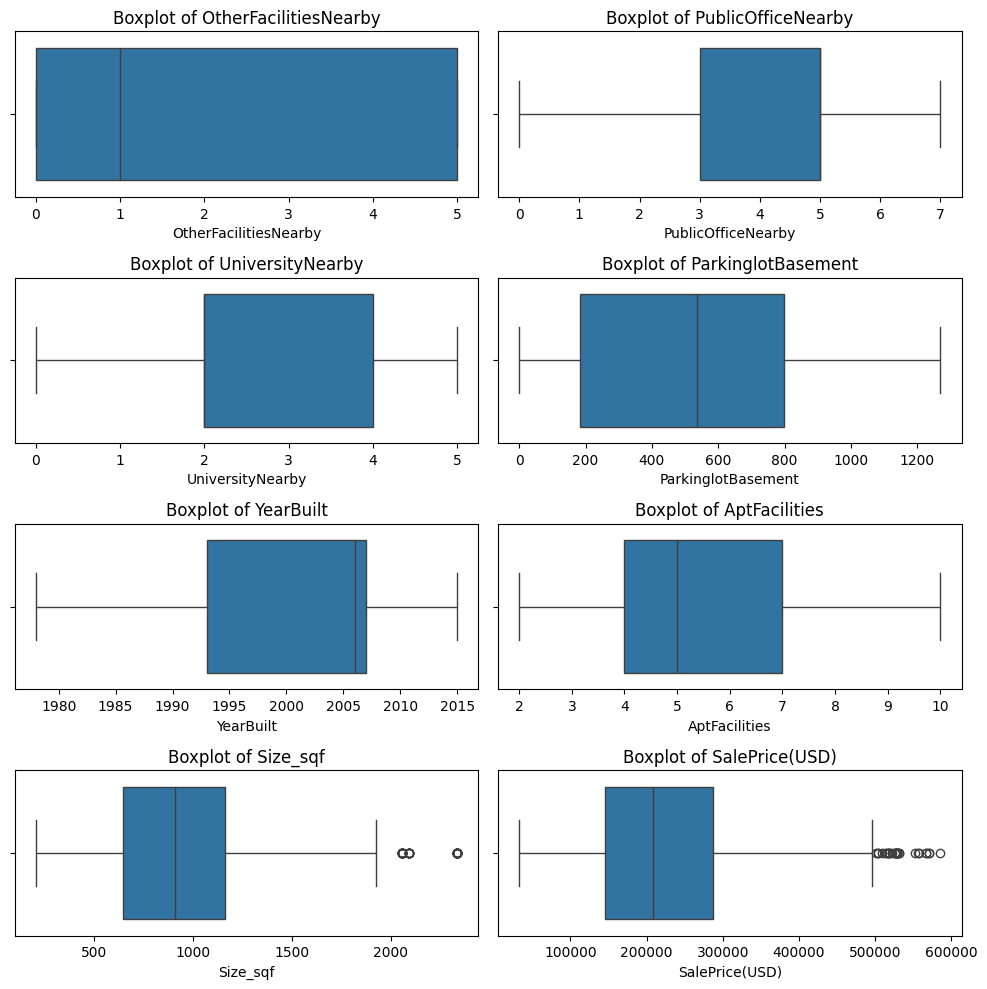

In [184]:
fig,axes = plt.subplots(4,2,figsize=(10,10))

for i, cols in enumerate(numerical_cols):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[cols], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {cols}')

plt.tight_layout()
plt.show()

#### Using Statistics Calculation

In [185]:
# define alpha value
alpha = 0.05
index = 1

dist_info = []
for col in numerical_cols:
    stat, p_value = normaltest(df[col].dropna())

    if p_value > alpha:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    skewness = df[col].skew()
    
    if skewness > 0:
        skewness_type = "Right Skew"
    else:
        skewness_type = "Left Skew"
    
    dist_info.append([col, stat, p_value, distribution, skewness, skewness_type])

# make dataframe from the results
distribution_info = pd.DataFrame(dist_info, columns=["Feature", 
                                                     "D'Agostino-Pearson Statistic", 
                                                     "P-value", 
                                                     "Distribution", 
                                                     "Skewness",
                                                     "Skewness Type"])
distribution_info

,Feature,D'Agostino-Pearson Statistic,P-value,Distribution,Skewness,Skewness Type
0,OtherFacilitiesNearby,22193.308375,0.000000e+00,Not Normally Distributed,0.524361,Right Skew
1,PublicOfficeNearby,528.883761,1.426758e-115,Not Normally Distributed,-0.185427,Left Skew
2,UniversityNearby,4340.485032,0.000000e+00,Not Normally Distributed,0.225325,Right Skew
3,ParkinglotBasement,689.129346,2.277528e-150,Not Normally Distributed,0.250497,Right Skew
4,YearBuilt,388.152736,5.172546e-85,Not Normally Distributed,-0.811691,Left Skew
5,AptFacilities,605.893099,2.703867e-132,Not Normally Distributed,0.543184,Right Skew
6,Size_sqf,498.609408,5.349863e-109,Not Normally Distributed,0.948433,Right Skew
7,SalePrice(USD),158.747927,3.375403e-35,Not Normally Distributed,0.492485,Right Skew


Our exploration of the data using boxplot diagrams and statistical calculations revealed that the numerical features in the dataframe likely do not follow a normal distribution. Additionally, we identified the presence of outliers in some columns. To determine the extent of outliers, we will calculate the Interquartile Range (IQR) for each numerical column.

### 3.3. Data Outlier

#### IQR (Interquartile Range)

In [186]:
# define function to calculate IQR and outlier
def IQR_outlier(data, col):
    Q1 = data[col].quantile(1/4)
    Q3 = data[col].quantile(3/4)
    IQR = Q3 - Q1
    outlier_lower = Q1 - 1.5 * IQR
    outlier_upper = Q3 + 1.5 * IQR
    total_outliers = len(data[(data[col] < outlier_lower) | (data[col] > outlier_upper)])
    outlier_percentage = round(total_outliers / len(data[col]) * 100, 2)
    return outlier_lower, outlier_upper, total_outliers, outlier_percentage

In [187]:
# define an empty list to store function result
outlier = []
for col in numerical_cols:
    lower_band, upper_band, total_outliers, outlier_percentage = IQR_outlier(df, col)
    outlier.append([col, lower_band, upper_band, total_outliers, outlier_percentage])

In [188]:
# turn the outlier list into a dataframe
outlier_info_df = pd.DataFrame(outlier, columns=['Features', 'Lower Band', 'Upper Band', 'Outliers', '% Outliers'])
outlier_info_df

,Features,Lower Band,Upper Band,Outliers,% Outliers
0,OtherFacilitiesNearby,-7.5,12.5,0,0.00
1,PublicOfficeNearby,0.0,8.0,0,0.00
2,UniversityNearby,-1.0,7.0,0,0.00
3,ParkinglotBasement,-737.0,1719.0,0,0.00
4,YearBuilt,1972.0,2028.0,0,0.00
5,AptFacilities,-0.5,11.5,0,0.00
6,Size_sqf,-130.0,1934.0,64,1.60
7,SalePrice(USD),-65310.5,498229.5,31,0.77


Outliers are data points that fall outside the typical range of the data. They can have a significant impact on regression models, potentially distorting predictions, especially for outlying values themselves.  In this dataset, we have outliers in two numerical columns (Size(sqf) and SalePrice(USD)), but the percentage of outliers is relatively low (less than 2%).

Thus, **we will remove the outliers in this project**. It's important to acknowledge that outlier removal can lead to data loss and potentially affect the generalizability of the model. However, given the low percentage of outliers and the focus on interpretability for the KFTC, we believe this approach is a reasonable choice for this specific project.

#### Delete Outlier

In [189]:
# delete outliers from the original DataFrame `df`
for index, row in outlier_info_df.iterrows():
    col = row['Features']
    lower_band = row['Lower Band']
    upper_band = row['Upper Band']
    
    # Filter rows outside the bounds and drop them from df
    df = df[(df[col] >= lower_band) & (df[col] <= upper_band)]

df = df.reset_index(drop=True)
df

,HallwayType,TimeToSubway,SubwayStation,OtherFacilitiesNearby,PublicOfficeNearby,UniversityNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf,SalePrice(USD)
0,terraced,0~5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0~5min,Sin-nam,0,1,2,536,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
3904,terraced,0~5min,Sin-nam,0,3,2,475,2008,8,914,323008
3905,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1451,242477
3906,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141
3907,corridor,5min~10min,Daegu,2,5,0,76,1985,3,676,73451


### 3.4. Correlation test

#### - Correlation for numerical column (Spearman) :

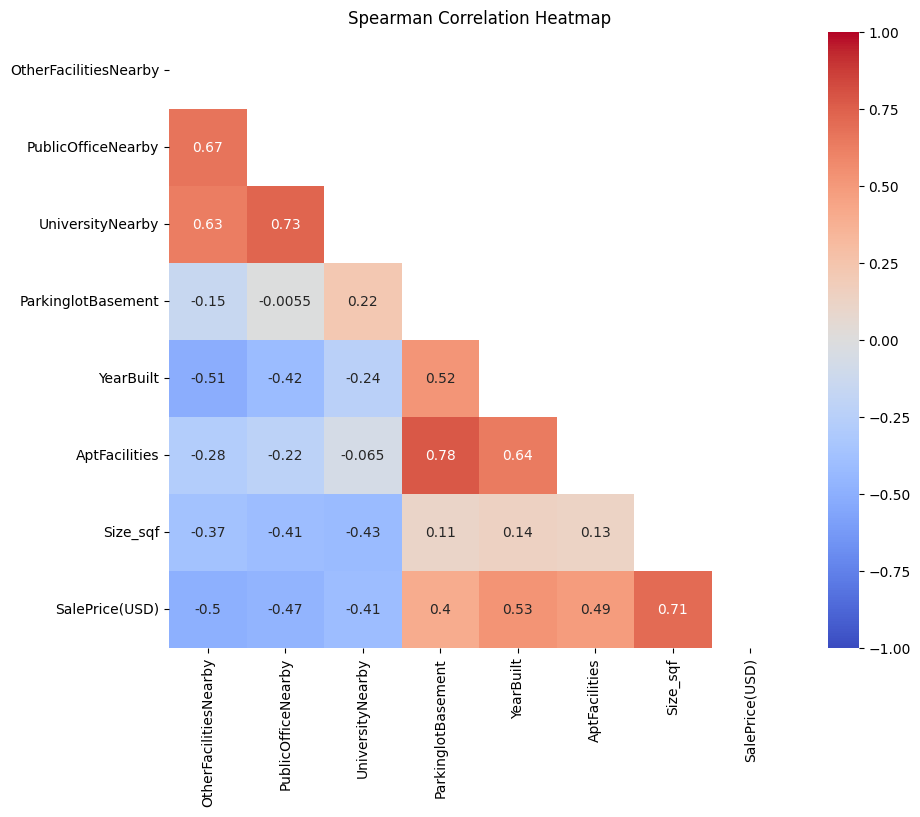

In [190]:
# Spearman correlation test
corr = df[numerical_cols].corr(method='spearman')
mask = np.triu(corr)
# create visualization using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, mask=mask, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

The heatmap analysis revealed several interesting correlations between the features in our dataset. We used the absolute value of the correlation coefficient to interpret the results, defining the strength of correlations as follows:
- Significant correlation: Absolute value ≥ 0.7
- Intermediate correlation: Absolute value between 0.3 and 0.7
- Weak correlation: Absolute value < 0.3

The heatmap indicates a significant positive correlation between the following variables:
- `'UniversityNearby'` with `'PublicOfficeNearby'`, this strong positive correlation suggests that universities and public offices are often located in close proximity.
- `'AptFacilities'` with `'ParkingLot(Basement)'`
- `'SalePrice(USD)'` with `'Size(sqf)'`

There are moderate correlation between :
- `'PublicOfficeNearby'` with `'OtherFacilitiesNearby'`
- `'UniversityNearby'` with `'OtherFacilitiesNearby'`
- `'YearBuilt'` with `'OtherFacilitiesNearby'` and `'PublicOfficeNearby'` (negative correlation)
- `'YearBuilt'` with `'ParkingLot(Basement)'` and `'AptFacilities'`, possibly newer buildings have more amenities or are located near newer public facilities
- `'Size(sqf)'` with `'OtherFacilitiesNearby'`, `'PublicOfficeNearby'`, and `'UniversityNearby'` (negative correlation)
- `'SalePrice(USD)'` with `'OtherFacilitiesNearby'`, `'PublicOfficeNearby'`, and `'UniversityNearby'` (negative correlation)
- `'SalePrice(USD)'` with `'ParkingLot(Basement)'`, `'YearBuilt'`, and `'AptFacilities'`

However, no significant correlation was observed between any other variables.

#### - Correlation for categorical column : (chi-square)

In [191]:
# chi-square test
def chi_square(col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    stat,pvalue,dof,expected_freq = chi2_contingency(contingency_table)
    if pvalue < 0.05:
        print(f"pvalue = {pvalue}, is lesser than alpha 0.05. Sufficient evidence to reject Ho.")
        print(f"Column <{col1}> and <{col2}> are DEPENDANTS.\n")
    else :
        print(f"pvalue = {pvalue}, is greater than alpha 0.05. Not enough evidence to reject Ho.")
        print(f"Column <{col1}> and <{col2}> are INDEPENDANTS.\n")
        

for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        chi_square(categorical_cols[i], categorical_cols[j])

pvalue = 0.0, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <HallwayType> and <TimeToSubway> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <HallwayType> and <SubwayStation> are DEPENDANTS.

pvalue = 0.0, is lesser than alpha 0.05. Sufficient evidence to reject Ho.
Column <TimeToSubway> and <SubwayStation> are DEPENDANTS.



The chi-square test results indicate that all categorical columns are dependent on all other columns, demonstrating a significant association between them.

### 3.5. Data Analysis

#### Frequency of each column

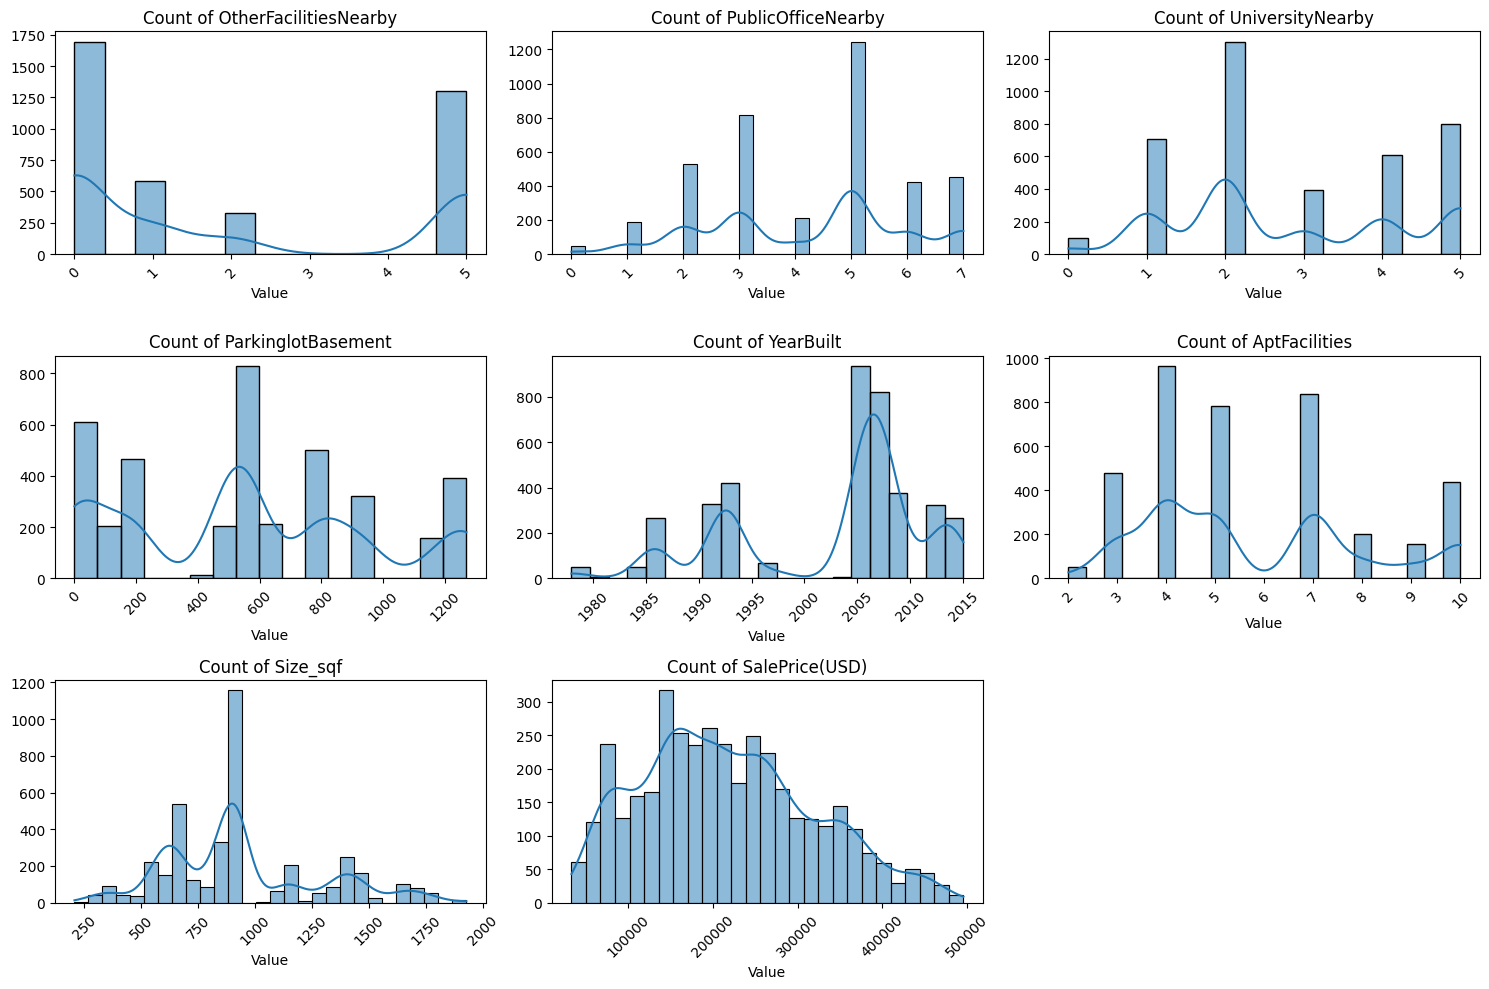

In [192]:
# create subplot
num_plots = len(numerical_cols)
num_cols = 3  # number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # number of rows in subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,10))

# flatten axes array to easily iterate over it
axes = axes.flatten()

# create a count plot
for i, column in enumerate(numerical_cols):
    sns.histplot(data=df, x=column, palette='viridis', ax=axes[i], kde=True)
    axes[i].set_title(f'Count of {column}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('')

# remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# display the plots
plt.tight_layout()
plt.show()

Characteristic of apartments in Daegu by numerical columns:
- **Other_FacilitiesNearby**: Most apartments (43.3%) have zero facilities other than public offices and universities nearby.
- **PublicOffice_Nearby & University_Nearby**: The majority of apartments are located near either public offices or universities, with a smaller percentage having none nearby.
- **Parkinglot(Basement)**: Apartments with around 536 parking spaces and those with less than 100 spaces are the most common types in Daegu.
- **YearBuilt**: A significant portion of the apartments were built between 2005 and 2008 (50.16%).
- **Apt_Facilities**: The majority of apartments offer 4-7 amenities.
- **Size(sqf)**: Most apartments range in size from 644 to 914 square feet.
- **SalePrice(USD)**: The sale price of most apartments falls between $144,247 USD and $283,185 USD.

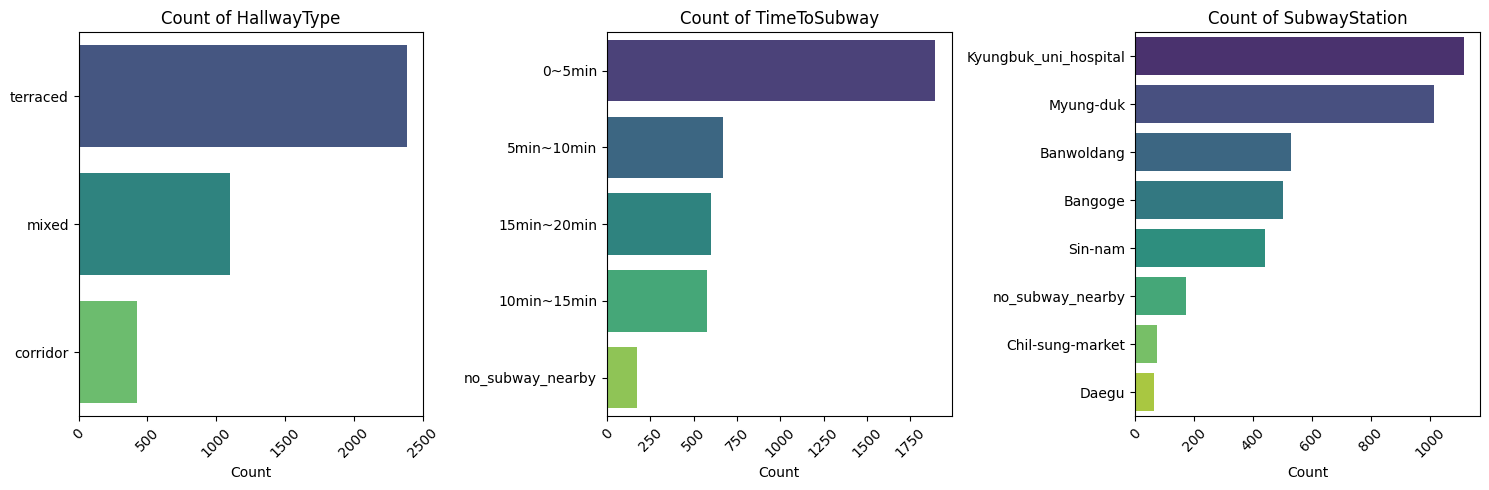

In [193]:
# create subplot
num_plots = len(categorical_cols)
num_cols = 3  # number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # number of rows in subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# flatten axes array to easily iterate over it
axes = axes.flatten()

# create a count plot
for i, column in enumerate(categorical_cols):
    sns.countplot(data=df, y=column, palette='viridis', ax=axes[i], order=df[column].value_counts().index)
    axes[i].set_title(f'Count of {column}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

# display the plots
plt.tight_layout()
plt.show()

#### Sale Price vs other categorical columns

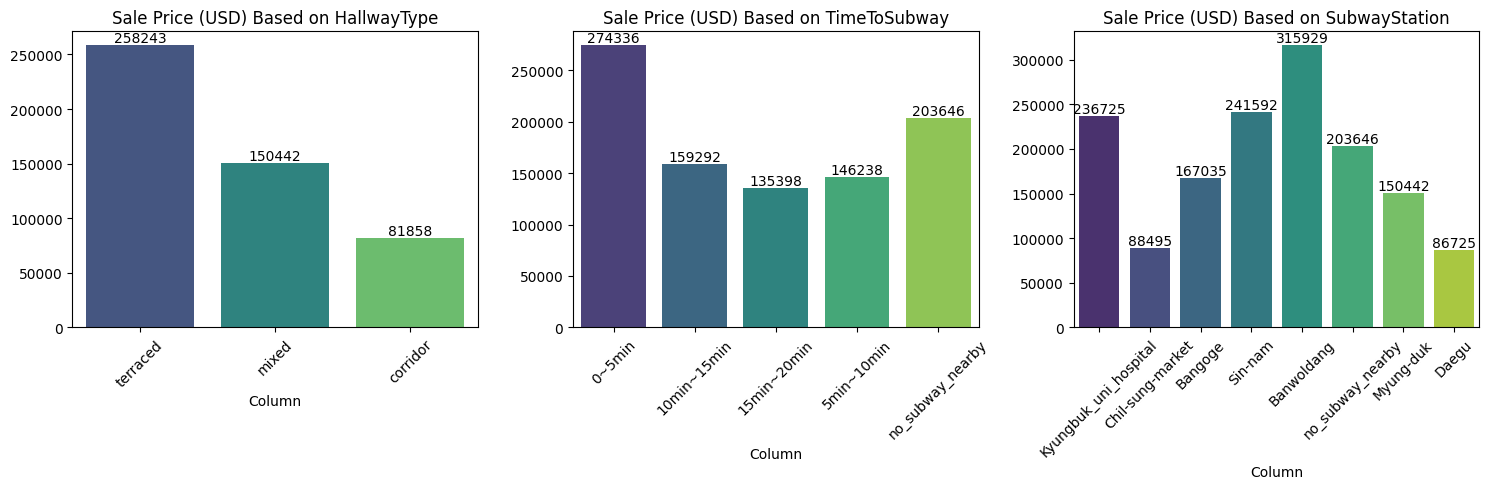

In [194]:
# create subplot
num_plots = len(categorical_cols)
num_cols = 3  # number of columns in subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # number of rows in subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# flatten axes array to easily iterate over it
axes = axes.flatten()

# create a count plot
for i, column in enumerate(categorical_cols):
    ax = sns.barplot(data=df, x=column, y='SalePrice(USD)', estimator='median', palette='viridis', ax=axes[i], errorbar=None)
    axes[i].set_title(f'Sale Price (USD) Based on {column}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Column')
    axes[i].set_ylabel('')

    # Adding value annotations
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge')

# display the plots
plt.tight_layout()
plt.show()

Characteristic of apartments in Daegu by categorical columns:

- Terraced hallway type apartments are the most common and have the highest median sale price ($258,243 USD). Followed by mixed hallway type ($150,442 USD), and corridor hallway type ($81,858 USD).
- Most apartments are located near subway stations (0-5 min) and have a higher median sale price ($274,336 USD) compared to those farther away. Apartment with 10-15min distance have median sale price $159,292 USD, then 5-10min distance in $146,238 USD, and the cheapest is for apartments with a 15-20min distance to the subway station ($135,398 USD).
- Kyungbuk_uni_hospital is the subway station with most apartment in the area around, followed by Myung-duk station, Banwoldang station, Bangoge, and Sin-nam station. Apartment near Banwoldang have higher median Sale Price ($315,929 USD), followed by Sin-nam station ($241,592 USD), Kyungbuk_uni_hospital ($236,725 USD), apartment with no_subway_nearby, Bangoge station, Myungduk station, Daegu Station and Chil-sung-market station

## **4. Feature Engineering**
---

This section focuses on preparing our data for the modeling process. We will perform several key steps to ensure the data is suitable for machine learning algorithms, such as rare label encoding, scalling, and data splitting.

### 4.1. Rare Label Encoding for categorical data

 Categorical features in our dataset might contain categories with very few observations, called "rare" categories. This categories can negatively impact models  by skewing the model towards more frequent categories. We will employ a technique called rare label encoding to identifies and groups rare categories into a single category and labeled it as 'Others'.

In [195]:
# calculate value counts and proportions
value_counts = df['SubwayStation'].value_counts()
proportions = value_counts / len(df)
proportions

SubwayStation
Kyungbuk_uni_hospital    0.285239
Myung-duk                0.259401
Banwoldang               0.135073
Bangoge                  0.128422
Sin-nam                  0.112561
no_subway_nearby         0.043745
Chil-sung-market         0.018931
Daegu                    0.016628
Name: count, dtype: float64

Values with a proportion of observations below 0.05 within each categorical feature will be grouped into a single label 'Others' using rare label encoding.

In [196]:
# rare label for Subway Station column
rare_label = RareLabelEncoder(
    tol=0.05,
    n_categories=6,
    variables=['SubwayStation'],
    replace_with='Others',
)

df = rare_label.fit_transform(df)

### 4.2. Splitting Train and Test data

We will split the data into training and testing sets using a random split.  This ensures both sets are representative of the entire dataset.  Typically, 80% of the data will be allocated to the training set (used to train the machine learning models) and 20% will be allocated to the testing set (used to evaluate the model's performance on unseen data).

In [197]:
X = df.drop(columns=['SalePrice(USD)'], axis=1)
y = df['SalePrice(USD)']

In [198]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=85, test_size=0.2)

### 4.3. Scaling and Encoding

**Numerical features :**

>Our data contains numerical features with varying value ranges. To ensure these features contribute equally to the machine learning model, we will perform a scaling technique.

>We will use **MinMaxScaler** that is not as robust to outliers as some other options, but since we've already removed outliers from the data, it's a suitable choice for our case. It transforms each feature into a range between 0 and 1.

**Categorical features :**

> Categorical features in our dataset require conversion into numerical representations suitable for machine learning models. We will employ **One-Hot Encoding** for all categorical features to maintains consistency in our feature engineering process and make our model more interpretable. 

> One-Hot Encoding creates new binary features for each unique category. For example, `HallwayType` might be transformed into three new features: `HallwayType_Terraced`,`HallwayType_Mixed`, and `HallwayType_Corridor`, each indicating presence or absence of that specific hallway type in the apartment.

In [201]:
# scaling and encoding pipeline

transformer = ColumnTransformer([
            ('MinMax',MinMaxScaler(),['PublicOfficeNearby','UniversityNearby','OtherFacilitiesNearby','ParkinglotBasement','YearBuilt','AptFacilities','Size_sqf']),
            ('OneHotEncoding', OneHotEncoder(), ['HallwayType','SubwayStation','TimeToSubway']),
            ], remainder='passthrough')

## **5. Modeling and Evaluation**
---

### 5.1. Choose Evaluation Metrics

Based on our primary goal, we need to obtain a machine learning model that delivers accurate sale price predictions. Therefore, we will use the following metrics with the order reflecting our priorities:

1. **Root Mean Squared Error (RMSE)**:
<br>RMSE measures the average magnitude of the errors between predicted and actual values. We prioritize RMSE first as it focuses on minimizing the magnitude of errors in the predicted sale prices, which directly relates to the accuracy of our predictions.

2. **Mean Absolute Percentage Error (MAPE)**:
<br>MAPE measures the average percentage error of the predictions relative to the actual values. This metric can be more interpretable in business contexts for stakeholders. For example, a MAPE of 5% would indicate that the model's predictions are on average within 5% of the actual sale prices, which stakeholders might find easier to understand compared to RMSE.

3. **Adjusted R-squared (Adj R2)**:
<br>Adj R-squared evaluates the proportion of the variance in the dependent variable (target sale price) that is explained by the independent variables (features), adjusted for the number of predictors in the model. Higher adjusted R-squared values indicate a better balance between model complexity and explanatory power, suggesting a stronger fit to the data.

### 5.2. Choose Benchmark Model

To identify the best performing model for predicting apartment sale prices in Daegu, we will benchmark several regression models. This involves comparing different models to determine which one provides the best performance as a reference for further development.

We will employ a variety of models from different categories, including linear models, non-linear models, and ensemble models, to assess which performs best:

- **Linear Regression:** <br>This model is used to model a linear relationship between input variables and a target variable.
- **Lasso Regression:** <br>This linear model reduces overfitting by adding the absolute number of coefficients as regularization to the linear regression equation.
- **Ridge Regression:** <br>Similar to Lasso Regression, this technique reduces overfitting by adding the sum of the squares of the coefficients as regularization.
- **Decision Tree Regression:** <br>This non-linear model utilizes a decision tree structure consisting of a series of nodes and edges to make predictions.
- **Random Forest Regression:** <br>This non-linear ensemble model builds several decision trees randomly to reduce overfitting.
- **Gradient Boosting Regression:** <br>This ensemble model builds trees sequentially, where each subsequent tree corrects errors made by the previous one.
- **XGBoost (eXtreme Gradient Boosting):** <br>This regression model utilizes gradient boosting techniques with an ensemble learning approach.
- **AdaBoost (Adaptive Boosting):** <br>This ensemble model sequentially builds new models based on the errors of the previous model to improve predictions.

We will also use `K-fold cross validation` as a method for evaluating model performance. This method is useful for avoiding overfitting or underfitting and for getting better model generalization.

In the end, we will decide the best performing model based on evaluation metrics that we decide before, the lowest RMSE (Root Mean Squared Error) while also considering MAPE (Mean Absolute Percentage Error) and Adjusted R-squared to ensure a balance between accuracy and interpretability.

In [202]:
# training process

# models for benchmark
LinReg = LinearRegression()
LassoR = Lasso(random_state=85)
RidgeR = Ridge(random_state=85)
Tree = DecisionTreeRegressor(random_state=85)
RForest = RandomForestRegressor(random_state=85)
GBR = GradientBoostingRegressor(random_state=85)
XGBoost = xgb.XGBRegressor(random_state=85)
Ada = AdaBoostRegressor(random_state=85)

models = [LinReg, LassoR, RidgeR, Tree, RForest, GBR, XGBoost, Ada]

# make blank list to store adj R2, RMSE, MAPE and training time from cross validation process
score_R2 = []
mean_adj_R2 = []
std_adj_R2 = []

score_RMSE=[]
mean_RMSE=[]
std_RMSE=[]

score_MAPE=[]
mean_MAPE=[]
std_MAPE=[]

training_times = []

crossval=KFold(n_splits=5, shuffle=True, random_state=85)

for model in models:
    model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',model)
    ])

    # start measure training time
    start_time = time.time()

    # adjusted R-Squared
    model_cv_R2=cross_val_score(model_pipeline,X_train,y_train,cv=crossval,scoring='r2')
    adj_r2 = 1 - (1 - model_cv_R2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
    mean_adj_R2.append(adj_r2.mean())
    std_adj_R2.append(adj_r2.std())

    # RMSE
    model_cv_RMSE=cross_val_score(model_pipeline,X_train,y_train,cv=crossval,scoring='neg_root_mean_squared_error')
    score_RMSE.append(model_cv_RMSE)
    mean_RMSE.append(model_cv_RMSE.mean())
    std_RMSE.append(model_cv_RMSE.std())

    # MAPE
    model_cv_MAPE=cross_val_score(model_pipeline,X_train,y_train,cv=crossval,scoring='neg_mean_absolute_percentage_error')
    score_MAPE.append(model_cv_MAPE)
    mean_MAPE.append(model_cv_MAPE.mean())
    std_MAPE.append(model_cv_MAPE.std())

    # end measure training time
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)

In [203]:
# training result

benchmark_model_train=pd.DataFrame({
    'Model': ['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','Gradient Boost','XGBoost','AdaBoost'],
    'Mean Adj R2 train': mean_adj_R2,
    'Std Adj R2 train': std_adj_R2,
    'Mean RMSE train': mean_RMSE,
    'Std RMSE train': std_RMSE,
    'Mean MAPE train': mean_MAPE,
    'Std MAPE train': std_MAPE,
    'Train Time (s)': training_times
}).sort_values(by=['Mean RMSE train', 'Mean MAPE train', 'Mean Adj R2 train',],ascending=False)

benchmark_model_train['Mean RMSE train'] = benchmark_model_train['Mean RMSE train'].abs()
benchmark_model_train['Mean MAPE train'] = benchmark_model_train['Mean MAPE train'].abs()
benchmark_model_train

,Model,Mean Adj R2 train,Std Adj R2 train,Mean RMSE train,Std RMSE train,Mean MAPE train,Std MAPE train,Train Time (s)
5,Gradient Boost,0.823981,0.014429,42633.793974,792.837730,0.188482,0.002378,2.818308
6,XGBoost,0.822611,0.015499,42793.570519,930.069727,0.187026,0.003832,1.003952
4,Random Forest,0.822618,0.015105,42796.010184,897.203358,0.187789,0.002872,4.050531
3,Decision Tree,0.822296,0.015319,42832.631206,887.649639,0.187449,0.003322,0.195662
7,AdaBoost,0.776051,0.015743,48108.102389,975.609134,0.245679,0.011780,1.555787
2,Ridge,0.759984,0.020373,49775.229620,933.803407,0.226226,0.005009,0.244282
1,Lasso,0.760000,0.019926,49776.738211,903.842300,0.225404,0.005088,0.731755
0,Linear Regression,0.759448,0.019642,49836.263911,875.212422,0.226171,0.006450,0.277944


The top four models (Gradient Boosting, XGBoost, Random Forest, and Decision Tree) exhibited very similar performance metrics, as shown in the table. Since these models have comparable accuracy, training time becomes a crucial factor. 

As evident from the "Train Time (s)" column, Decision Tree has the fastest training time (0.13 seconds) compared to the others. 

We will now predict on the test data using the benchmark models and compare their performance metrics to identify the final benchmark model.

In [204]:
# predict process

# make blank list to store the metrics result
score_R2=[]
adj_R2 = []
score_RMSE=[]
score_MAPE=[]
predict_times = []

for model in models:
    model_pipeline=Pipeline([
        ('preprocess',transformer),
        ('model', model)
        ])

    # fit the model
    model_pipeline.fit(X_train, y_train)

    # start measure predict time
    start_time = time.time()

    # make predictions
    y_pred=model_pipeline.predict(X_test)

    # end measure predict time
    end_time = time.time()
    predict_time = end_time - start_time
    predict_times.append(predict_time)

    # calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    score_R2.append(r2)    
    score_RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_MAPE.append(mean_absolute_percentage_error(y_test, y_pred))
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    adj_R2.append(adj_r2)

benchmark_model_test=pd.DataFrame({
    'Model' : ['Linear Regression','Lasso','Ridge','Decision Tree','Random Forest','Gradient Boost','XGBoost','AdaBoost'],
    'Adj R2 test': adj_R2,'RMSE test': score_RMSE, 'MAPE test': score_MAPE,
    'Test Time (s)': predict_times}).sort_values(by=['Adj R2 test','RMSE test','MAPE test'],ascending=False)

benchmark_model_test

,Model,Adj R2 test,RMSE test,MAPE test,Test Time (s)
5,Gradient Boost,0.822142,41636.059947,0.187012,0.005095
3,Decision Tree,0.821136,41753.649147,0.184692,0.002002
6,XGBoost,0.820733,41800.596184,0.185257,0.006005
4,Random Forest,0.820638,41811.672552,0.185507,0.009729
7,AdaBoost,0.783781,45907.056585,0.234914,0.006002
0,Linear Regression,0.756381,48729.132589,0.226650,0.004404
1,Lasso,0.756062,48761.026361,0.227172,0.004002
2,Ridge,0.755736,48793.576025,0.228071,0.004009


As expected from the training data, Gradient Boost, Decision Tree, XGBoost, and Random Forest continue to exhibit strong performance on predicting the test data. To identify the most stable model among these top contenders, we will now compare their evaluation metrics (Adj R2, RMSE, MAPE) and analyze the difference between their training and test set performance (train-test gap). This will help us select the model that generalizes best to unseen data.

In [205]:
# combine and compare train and predict result
benchmark_model = benchmark_model_test.set_index('Model').join(benchmark_model_train.set_index('Model'))

In [206]:
# make new column contain difference value (test - train)
benchmark_model['diff_Adj_R2'] = (benchmark_model['Adj R2 test'] - benchmark_model['Mean Adj R2 train']).agg('abs')
benchmark_model['diff_RMSE'] = (benchmark_model['RMSE test'] - benchmark_model['Mean RMSE train']).agg('abs')
benchmark_model['diff_MAPE'] = (benchmark_model['MAPE test'] - benchmark_model['Mean MAPE train']).agg('abs')

In [207]:
# difference result
benchmark_model = benchmark_model[['diff_Adj_R2','diff_RMSE','diff_MAPE']].sort_values(by=['diff_RMSE','diff_MAPE'],ascending=True)
benchmark_model

,diff_Adj_R2,diff_RMSE,diff_MAPE
Model,,,
Ridge,0.004248,981.653595,0.001844
Random Forest,0.001979,984.337632,0.002283
XGBoost,0.001877,992.974335,0.001769
Gradient Boost,0.001839,997.734027,0.001470
Lasso,0.003938,1015.711850,0.001768
Decision Tree,0.001160,1078.982059,0.002757
Linear Regression,0.003067,1107.131322,0.000479
AdaBoost,0.007730,2201.045804,0.010764


From the table above, we can observe the differences in performance metrics between the training and prediction processes for each model. The smaller the difference, the more stable the model's performance.

**Summary of Training and Prediction Process :**

- Gradient Boost has the lowest RMSE score and the highest Adjusted R² during both training and prediction processes.

- Decision Tree and XGBoost are the fastest models for training and prediction. Both also show good performance alongside the Gradient Boost model in training and prediction processes.

- Gradient Boost is the most stable model, as indicated by the smallest differences between training and prediction metrics.

Based on these observations, we will **tune the 3 best models: Decision Tree, XGBoost, and Gradient Boost**. This can potentially improve their performance further and provide a more definitive selection of the best model for our specific dataset

### 5.3. Hyperparameter Tuning for Best Models

Hyperparameters are certain values or weights that determine the learning process of an algorithm. In this step, we will tune the top 3 performing models (Decision Tree, XGBoost, and Gradient Boost) identified during the benchmark stage. Hyperparameter tuning involves optimizing the model's internal configuration to improve its performance on unseen data.

To ensure we don't overfit the model to the training data and achieve robust parameter selection, we will employ **K-Fold cross-validation**. This technique works by splitting the training data into a predefined number of folds (e.g., 5 or 10). The model is then trained on a combination of all folds except one, which is used for evaluation. This process is repeated for each fold, allowing the model to be evaluated on a variety of unseen data within the training set. K-Fold CV **provides a more reliable estimate of how well the model will generalize to unseen data compared to simply evaluating on the entire training set**.

For the hyperparameter tuning, we will consider two techniques: **GridSearchCV** and **RandomizedSearchCV**. The choice between them depends on the complexity and size of the hyperparameter space we're exploring:

- **GridSearchCV:** 
> This method systematically **evaluates all possible combinations of hyperparameter values** within a predefined grid. It offers a guaranteed optimal solution within the defined search space. However, GridSearchCV can become **computationally expensive, especially for models with a large number of hyperparameters**.

- **RandomizedSearchCV:** 
> This method addresses the limitations of GridSearchCV by **randomly sampling hyperparameter combinations from a defined distribution**. While it might not guarantee the absolute optimal solution, RandomizedSearchCV is often **computationally more efficient, particularly for large search spaces or when dealing with limited computational resources like laptops**.

We will carefully analyze the number and complexity of hyperparameters for each of our top models. If the search space is manageable, GridSearchCV might be a good choice for its guaranteed optimal solution. However, if we're dealing with a large number of hyperparameters or limited resources, RandomizedSearchCV's efficiency will likely be more advantageous.

#### Tuning Decision Tree Model

In [208]:
# determine the hyperparameter for tuning the Decision Tree model
param_tree = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_leaf_nodes': [None, 10, 20, 30],
    'model__min_impurity_decrease': [0.0, 0.1, 0.2],
    'model__criterion': ['absolute_error','squared_error','friedman_mse','poisson'],
    'model__random_state': [85]
}

In [209]:
model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',Tree)
    ])

In [210]:
# tuning process using cross validation
cv = KFold(n_splits=5, shuffle=True,random_state=85)

# start measure tuning time
start_time = time.time()

# tuning process
tree_grid = GridSearchCV(estimator=model_pipeline, param_grid=param_tree, cv=5, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
tree_grid.fit(X_train, y_train)

# end measure tuning time
end_time = time.time()
tree_tune_time = end_time - start_time

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


In [211]:
# best parameter result
best_params = tree_grid.best_params_
best_params

{'model__criterion': 'poisson',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 10,
 'model__random_state': 85}

In [212]:
# tuned Decision Tree model with best parameter
tree_tuned = tree_grid.best_estimator_

In [213]:
# fitting tuned Decision Tree model to the train data
tree_tuned.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  ['PublicOfficeNearby',
                                                   'UniversityNearby',
                                                   'OtherFacilitiesNearby',
                                                   'ParkinglotBasement',
                                                   'YearBuilt', 'AptFacilities',
                                                   'Size_sqf']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'SubwayStation',
                                                   'TimeToSubway'])])),
                ('model',
                 DecisionTreeRegressor(criterion='poisson', max_features='sqrt',
                                       min_samples_split=10,
                                       random_state=85))])

In [214]:
# predict X_train with tuned Decision Tree model
y_pred_tree_tuned_train= tree_tuned.predict(X_train)

In [215]:
# calculate metrics with tuned Decision Tree model

r2_tree_grid = metrics.r2_score(y_train,y_pred_tree_tuned_train)
adj_r2_tree = 1 - (1 - r2_tree_grid) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
rmse_tree_grid = np.sqrt(metrics.mean_squared_error(y_train, y_pred_tree_tuned_train))
mape_tree_grid = metrics.mean_absolute_percentage_error(y_train, y_pred_tree_tuned_train)

tree_tuned_train_tab = pd.DataFrame({'Tuned Train Decision Tree' : [adj_r2_tree, mape_tree_grid, rmse_tree_grid, tree_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE','time(s)']).T
tree_tuned_train_tab

,Adj R2,MAPE,RMSE,time(s)
Tuned Train Decision Tree,0.835192,0.180637,41341.211659,142.288086


In [216]:
# predict X_test with tuned Decision Tree model
y_pred_tree_tuned_test= tree_tuned.predict(X_test)

In [217]:
# calculate metrics with tuned Decision Tree model

r2_tree_grid = metrics.r2_score(y_test,y_pred_tree_tuned_test)
adj_r2_tree = 1 - (1 - r2_tree_grid) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_tree_grid = np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree_tuned_test))
mape_tree_grid = metrics.mean_absolute_percentage_error(y_test, y_pred_tree_tuned_test)

tree_tuned_pred_tab = pd.DataFrame({'Tuned Test Decision Tree' : [adj_r2_tree, mape_tree_grid, rmse_tree_grid, tree_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE','time(s)']).T
tree_tuned_pred_tab

,Adj R2,MAPE,RMSE,time(s)
Tuned Test Decision Tree,0.821694,0.183829,41688.465614,142.288086


#### Tuning XGBoost Model

In [218]:
# determine the hyperparameter for tuning the XGBoost model
param_XGB = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [ 0.1, 0.2],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 4],
    'model__subsample': [0.8, 1.0],
    'model__max_features': ['sqrt'],
    'model__loss': ['huber'],
    'model__random_state': [85]
}

In [219]:
model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',XGBoost)
    ])

In [220]:
# tuning process using cross validation
cv = KFold(n_splits=5, shuffle=True,random_state=85)

# start measure tuning time
start_time = time.time()

# tuning process
XGB_grid = GridSearchCV(estimator=model_pipeline, param_grid=param_XGB, cv=cv, scoring='r2', verbose=1, n_jobs=-1)
XGB_grid.fit(X_train, y_train)

# end measure tuning time
end_time = time.time()
XGB_tune_time = end_time - start_time

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [221]:
# best parameter result
best_params = XGB_grid.best_params_
best_params

{'model__learning_rate': 0.1,
 'model__loss': 'huber',
 'model__max_depth': 3,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 5,
 'model__n_estimators': 100,
 'model__random_state': 85,
 'model__subsample': 0.8}

In [222]:
# tuned XGBoost model with best parameter
XGB_tuned = XGB_grid.best_estimator_

In [223]:
# fitting tuned XGBoost model
XGB_tuned.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  ['PublicOfficeNearby',
                                                   'UniversityNearby',
                                                   'OtherFacilitiesNearby',
                                                   'ParkinglotBasement',
                                                   'YearBuilt', 'AptFacilities',
                                                   'Size_sqf']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'SubwayStation',
                                                   'TimeToSubway'])])),
                ('model',
                 XGBRegressor(base_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              loss='huber', max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3,
                              max_features='sqrt', max_leaves=None,
                              min_child_weight=None, min_samples_leaf=2,
                              min_samples_split=5, missing=nan,
                              monotone_constraints=None, multi_strategy=None, ...))])

In [224]:
# predict X_train with tuned XGBoost model
y_pred_XGB_tuned_train= XGB_tuned.predict(X_train)

In [225]:
# calculate metrics with tuned XGBoost model

r2_XGB_grid = metrics.r2_score(y_train,y_pred_XGB_tuned_train)
adj_r2_XGB_train = 1 - (1 - r2_XGB_grid) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
rmse_XGB_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_XGB_tuned_train))
mape_XGB_train = metrics.mean_absolute_percentage_error(y_train, y_pred_XGB_tuned_train)

XGB_tuned_train_tab = pd.DataFrame({'Tuned Train XGBoost' : [adj_r2_XGB_train, mape_XGB_train, rmse_XGB_train,XGB_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE', 'time(s)']).T
XGB_tuned_train_tab

,Adj R2,MAPE,RMSE,time(s)
Tuned Train XGBoost,0.833302,0.183494,41577.651078,5.349143


In [226]:
# predict X_test with tuned XGBoost model
y_pred_XGB_tuned_test= XGB_tuned.predict(X_test)

In [227]:
# calculate metrics with tuned XGBoost model 

r2_XGB_grid = metrics.r2_score(y_test,y_pred_XGB_tuned_test)
adj_r2_XGB_test = 1 - (1 - r2_XGB_grid) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_XGB_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_XGB_tuned_test))
mape_XGB_test = metrics.mean_absolute_percentage_error(y_test, y_pred_XGB_tuned_test)

XGB_tuned_test_tab = pd.DataFrame({'Tuned Test XGBoost' : [adj_r2_XGB_test, mape_XGB_test, rmse_XGB_test,XGB_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE', 'time(s)']).T
XGB_tuned_test_tab

,Adj R2,MAPE,RMSE,time(s)
Tuned Test XGBoost,0.822205,0.185661,41628.674035,5.349143


#### Tuning Gradient Boost Model

In [228]:
# determine the hyperparameter for tuning the Gradient Boost model
param_GBR = {
    'model__n_estimators': list(np.arange(100, 201)),
    'model__learning_rate': list(np.arange(1, 100)/100),
    'model__max_depth': list(np.arange(2, 30)),
    'model__min_samples_split': [5, 10],
    'model__min_samples_leaf': [2, 4],
    'model__subsample': list(np.arange(1, 10)/10),
    'model__max_features': ['sqrt'],
    'model__loss': ['huber'],
    'model__random_state': [85]
}

In [229]:
model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',XGBoost)
    ])

In [230]:
# tuning process using cross validation
cv = KFold(n_splits=5, shuffle=True, random_state=85)

# start measure tuning time
start_time = time.time()

# tuning process
GBR_grid = RandomizedSearchCV(estimator=model_pipeline, param_distributions=param_GBR, cv=cv, scoring='r2', verbose=1, n_jobs=-1,random_state=85)
GBR_grid.fit(X_train, y_train)

# end measure tuning time
end_time = time.time()
GBR_tune_time = end_time - start_time

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [231]:
# best parameter result
best_params = GBR_grid.best_params_
best_params

{'model__subsample': 0.8,
 'model__random_state': 85,
 'model__n_estimators': 152,
 'model__min_samples_split': 10,
 'model__min_samples_leaf': 2,
 'model__max_features': 'sqrt',
 'model__max_depth': 21,
 'model__loss': 'huber',
 'model__learning_rate': 0.41}

In [232]:
# tuned XGBoost model with best parameter
GBR_tuned = GBR_grid.best_estimator_

In [233]:
# fitting tuned XGBoost model
GBR_tuned.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  ['PublicOfficeNearby',
                                                   'UniversityNearby',
                                                   'OtherFacilitiesNearby',
                                                   'ParkinglotBasement',
                                                   'YearBuilt', 'AptFacilities',
                                                   'Size_sqf']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'SubwayStation',
                                                   'TimeToSubway'])])),
                ('model',
                 XGBRegressor(base_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.41,
                              loss='huber', max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=21,
                              max_features='sqrt', max_leaves=None,
                              min_child_weight=None, min_samples_leaf=2,
                              min_samples_split=10, missing=nan,
                              monotone_constraints=None, multi_strategy=None, ...))])

In [234]:
# predict X_train with tuned XGBoost model
y_pred_GBR_tuned_train= GBR_tuned.predict(X_train)

In [235]:
# calculate metrics with tuned XGBoost model 

r2_GBR_grid = metrics.r2_score(y_train,y_pred_GBR_tuned_train)
adj_r2_GBR = 1 - (1 - r2_GBR_grid) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)
rmse_GBR_grid = np.sqrt(metrics.mean_squared_error(y_train, y_pred_GBR_tuned_train))
mape_GBR_grid = metrics.mean_absolute_percentage_error(y_train, y_pred_GBR_tuned_train)

GBR_tuned_train_tab = pd.DataFrame({'Tuned Train Gradient Boost' : [adj_r2_GBR, mape_GBR_grid, rmse_GBR_grid,GBR_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE', 'time(s)']).T
GBR_tuned_train_tab

,Adj R2,MAPE,RMSE,time(s)
Tuned Train Gradient Boost,0.83505,0.180703,41359.01699,3.141616


In [236]:
# predict X_test with tuned XGBoost model
y_pred_GBR_tuned_test= GBR_tuned.predict(X_test)

In [237]:
# calculate metrics with tuned XGBoost model 

from sklearn import metrics

r2_GBR_grid = metrics.r2_score(y_test,y_pred_GBR_tuned_test)
adj_r2_GBR = 1 - (1 - r2_GBR_grid) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
rmse_GBR_grid = np.sqrt(metrics.mean_squared_error(y_test, y_pred_GBR_tuned_test))
mape_GBR_grid = metrics.mean_absolute_percentage_error(y_test, y_pred_GBR_tuned_test)

GBR_tuned_pred_tab = pd.DataFrame({'Tuned Test Gradient Boost' : [adj_r2_GBR, mape_GBR_grid, rmse_GBR_grid,GBR_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE', 'time(s)']).T
GBR_tuned_pred_tab

,Adj R2,MAPE,RMSE,time(s)
Tuned Test Gradient Boost,0.820777,0.185028,41795.475264,3.141616


### Benchmark metrics value before and after tuning for 3 best models

In [238]:
# model result before tuning
print('Evaluatiion Metrics Before Tuning')
benchmark_model_test[(benchmark_model_test['Model']=='Decision Tree') | (benchmark_model_test['Model']=='XGBoost') | (benchmark_model_test['Model']=='Gradient Boost')]

Evaluatiion Metrics Before Tuning


,Model,Adj R2 test,RMSE test,MAPE test,Test Time (s)
5,Gradient Boost,0.822142,41636.059947,0.187012,0.005095
3,Decision Tree,0.821136,41753.649147,0.184692,0.002002
6,XGBoost,0.820733,41800.596184,0.185257,0.006005


In [239]:
# model result after tuning
metrics_tuned = pd.concat([tree_tuned_train_tab, tree_tuned_pred_tab,XGB_tuned_train_tab,XGB_tuned_test_tab,GBR_tuned_train_tab,GBR_tuned_pred_tab])
print('Evaluatiion Metrics After Tuning')
metrics_tuned

Evaluatiion Metrics After Tuning


,Adj R2,MAPE,RMSE,time(s)
Tuned Train Decision Tree,0.835192,0.180637,41341.211659,142.288086
Tuned Test Decision Tree,0.821694,0.183829,41688.465614,142.288086
Tuned Train XGBoost,0.833302,0.183494,41577.651078,5.349143
Tuned Test XGBoost,0.822205,0.185661,41628.674035,5.349143
Tuned Train Gradient Boost,0.835050,0.180703,41359.016990,3.141616
Tuned Test Gradient Boost,0.820777,0.185028,41795.475264,3.141616


XGBoost after tuning achieves the highest adjusted R2 value and lowest RMSE value on the test data compared to the other tuned models. It also exhibits the most stability, with the lowest difference in metrics between the train and test data. Even though the hyperparameters for each model differed, XGBoost was relatively fast to tune. Therefore, for **our best model, we choose the tuned XGBoost model**.

### 5.4. Feature Importance

After selecting the tuned XGBoost as our best model, we will utilize it to compute the feature importance for all features in our dataset. Feature importance helps us understand which features contribute most to the model's predictions. We plan to leverage these importance values for feature selection.  We will use a **threshold-based selection**, where we remove features that fall below a certain importance score.  We will then evaluate the model's performance with the reduced feature set to see if it improves or maintains its effectiveness.

In [240]:
# get features name
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['PublicOfficeNearby',
 'UniversityNearby',
 'OtherFacilitiesNearby',
 'ParkinglotBasement',
 'YearBuilt',
 'AptFacilities',
 'Size_sqf',
 'HallwayType_corridor',
 'HallwayType_mixed',
 'HallwayType_terraced',
 'SubwayStation_Bangoge',
 'SubwayStation_Banwoldang',
 'SubwayStation_Kyungbuk_uni_hospital',
 'SubwayStation_Myung-duk',
 'SubwayStation_Others',
 'SubwayStation_Sin-nam',
 'TimeToSubway_0~5min',
 'TimeToSubway_10min~15min',
 'TimeToSubway_15min~20min',
 'TimeToSubway_5min~10min',
 'TimeToSubway_no_subway_nearby']

In [241]:
# assign feature importance to variable
importance = XGB_tuned[-1].feature_importances_

In [242]:
# to dataframe
feature_imp = pd.DataFrame({
    'Feature':list_features,
    'Importance':importance
}).sort_values(by='Importance',ascending=False)
feature_imp

,Feature,Importance
9,HallwayType_terraced,0.603002
16,TimeToSubway_0~5min,0.262197
6,Size_sqf,0.040994
4,YearBuilt,0.028690
3,ParkinglotBasement,0.023618
5,AptFacilities,0.011055
7,HallwayType_corridor,0.009717
10,SubwayStation_Bangoge,0.003780
20,TimeToSubway_no_subway_nearby,0.002665
11,SubwayStation_Banwoldang,0.002328


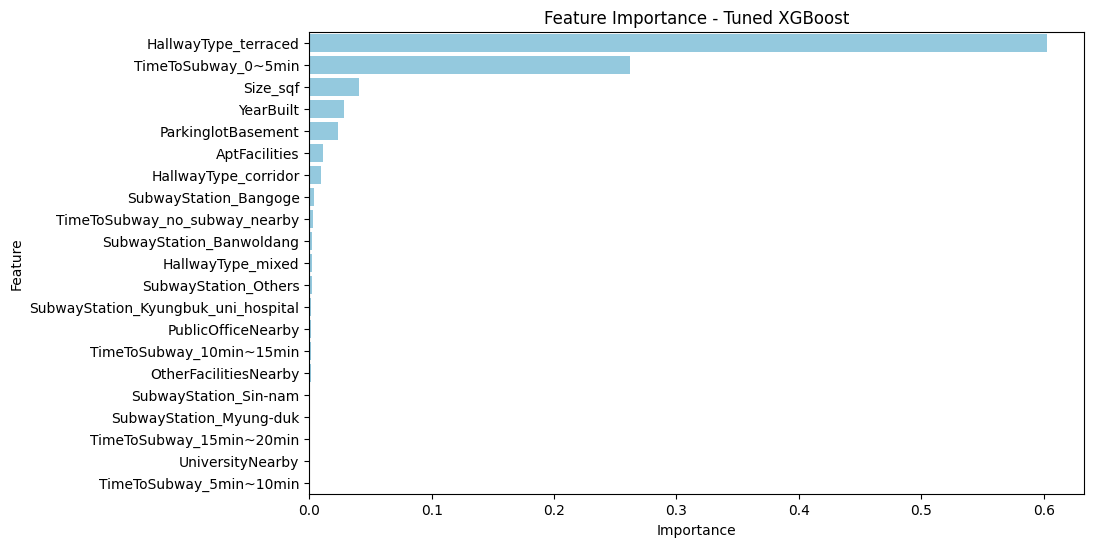

In [243]:
# visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp,y=feature_imp['Feature'], x=feature_imp['Importance'], orient='h', color='skyblue',)
plt.xlabel('Importance')
plt.title('Feature Importance - Tuned XGBoost')
plt.show()

### 5.5. Feature Selection

From the features importance, we know that several features have low (even 0) importance to our model. However, it's important to consider the potential impact of deleting features, such as information loss. Therefore, we will start with a small reduction by **deleting features with importance values below a threshold of 0.001**. After deleting these features, we will evaluate the model's performance on evaluation metrics (RMSE, MAPE, and Adjusted R-Square) to see if it improves or maintains its effectiveness compared to the original model. This iterative process will help us identify features that can be removed without significantly impacting the model's performance.

In [244]:
X_train_select = X_train.copy()
X_test_select = X_test.copy()
y_train_select = pd.DataFrame(y_train.copy())
y_test_select = pd.DataFrame(y_test.copy())

In [245]:
X_train_select = X_train_select.drop(columns=['HallwayType','OtherFacilitiesNearby','SubwayStation','PublicOfficeNearby'], axis=1)
X_test_select = X_test_select.drop(columns=['HallwayType','OtherFacilitiesNearby','SubwayStation','PublicOfficeNearby'], axis=1)

In [249]:
# scaling and encoding pipeline

transformer = ColumnTransformer([
            ('MinMax',MinMaxScaler(),['UniversityNearby','ParkinglotBasement','YearBuilt','AptFacilities','Size_sqf']),
            ('OneHotEncoding', OneHotEncoder(), ['TimeToSubway']),
            ], remainder='passthrough')

In [250]:
model_pipeline=Pipeline([
    ('preprocess',transformer),
    ('model',XGBoost)
    ])

### 5.6. XGBoost After Feature Selection

In [251]:
# tuning process using cross validation
cv = KFold(n_splits=5, shuffle=True,random_state=85)

# start measure tuning time
start_time = time.time()

# tuning process
XGB_select = GridSearchCV(estimator=model_pipeline, param_grid=param_XGB, cv=cv, scoring='r2', verbose=1, n_jobs=-1)
XGB_select.fit(X_train_select, y_train_select)

# end measure tuning time
end_time = time.time()
XGB_tune_time = end_time - start_time

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [252]:
# best parameter result
best_params = XGB_select.best_params_
best_params

{'model__learning_rate': 0.2,
 'model__loss': 'huber',
 'model__max_depth': 3,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 5,
 'model__n_estimators': 100,
 'model__random_state': 85,
 'model__subsample': 0.8}

In [253]:
# tuned XGBoost model with best parameter
XGB_select_tuned = XGB_select.best_estimator_

In [254]:
# fitting tuned XGBoost model
XGB_select_tuned.fit(X_train_select,y_train_select)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  ['UniversityNearby',
                                                   'ParkinglotBasement',
                                                   'YearBuilt', 'AptFacilities',
                                                   'Size_sqf']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['TimeToSubway'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_byn...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              loss='huber', max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3,
                              max_features='sqrt', max_leaves=None,
                              min_child_weight=None, min_samples_leaf=2,
                              min_samples_split=5, missing=nan,
                              monotone_constraints=None, multi_strategy=None, ...))])

In [255]:
# predict X_train with tuned XGBoost model
y_pred_XGBtrain_select= XGB_select_tuned.predict(X_train_select)

In [256]:
# calculate metrics with tuned XGBoost model

r2_XGBtrain_select = metrics.r2_score(y_train_select,y_pred_XGBtrain_select)
adj_r2_XGBtrain_select = 1 - (1 - r2_XGBtrain_select) * (len(y_train_select) - 1) / (len(y_train_select) - X_train_select.shape[1] - 1)
rmse_XGBtrain_select = np.sqrt(metrics.mean_squared_error(y_train_select, y_pred_XGBtrain_select))
mape_XGBtrain_select = metrics.mean_absolute_percentage_error(y_train_select, y_pred_XGBtrain_select)

XGBtrain_select = pd.DataFrame({'Tuned Train XGBoost' : [adj_r2_XGBtrain_select, mape_XGBtrain_select, rmse_XGBtrain_select,XGB_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE', 'time(s)']).T
XGBtrain_select

,Adj R2,MAPE,RMSE,time(s)
Tuned Train XGBoost,0.834907,0.18122,41403.550697,2.059757


In [257]:
# predict X_test with tuned XGBoost model
y_pred_XGBtest_select= XGB_select_tuned.predict(X_test_select)

In [258]:
# calculate metrics with tuned XGBoost model 

r2_XGBtest_select = metrics.r2_score(y_test_select,y_pred_XGBtest_select)
adj_r2_XGBtest_select = 1 - (1 - r2_XGBtest_select) * (len(y_test_select) - 1) / (len(y_test_select) - X_test_select.shape[1] - 1)
rmse_XGBtest_select= np.sqrt(metrics.mean_squared_error(y_test_select, y_pred_XGBtest_select))
mape_XGBtest_select = metrics.mean_absolute_percentage_error(y_test_select, y_pred_XGBtest_select)

XGB_tuned_test_tab = pd.DataFrame({'Tuned Test XGBoost' : [adj_r2_XGBtest_select, mape_XGBtest_select, rmse_XGBtest_select,XGB_tune_time]}, index=['Adj R2', 'MAPE', 'RMSE', 'time(s)']).T
XGB_tuned_test_tab

,Adj R2,MAPE,RMSE,time(s)
Tuned Test XGBoost,0.821745,0.184614,41790.47618,2.059757


In [259]:
benchmark_model_XGBoost=pd.DataFrame({'Model': ['XGBoost tuned train','XGBoost tuned test','XGBoost selection train','XGBoost selection test'],
                                  'Adj R2':[adj_r2_XGB_train,adj_r2_XGB_test,adj_r2_XGBtrain_select,adj_r2_XGBtest_select],
                                  'RMSE': [rmse_XGB_train,rmse_XGB_test,rmse_XGBtrain_select,rmse_XGBtest_select],
                                  'MAPE': [mape_XGB_train,mape_XGB_test,mape_XGBtrain_select,mape_XGBtest_select]
                                  }).set_index('Model')
benchmark_model_XGBoost

,Adj R2,RMSE,MAPE
Model,,,
XGBoost tuned train,0.833302,41577.651078,0.183494
XGBoost tuned test,0.822205,41628.674035,0.185661
XGBoost selection train,0.834907,41403.550697,0.181220
XGBoost selection test,0.821745,41790.476180,0.184614


Feature selection result :

| **No.** | **Deleted Features** | **Adj R2 Score** | **RMSE Score** | **MAPE Score** |
| --- | --- | --- | --- | --- |
| 1 | HallwayType | 0.822433 | 41628.909461 | 0.185079 |
| 2 | HallwayType, OtherFacilitiesNearby | 0.822109 | 41693.829228 | 0.186858 |
| 3 | HallwayType, OtherFacilitiesNearby, SubwayStation | 0.822883 | 41630.007755 | 0.184736 |
| 4 | HallwayType, OtherFacilitiesNearby, SubwayStation, PublicOfficeNearby | 0.821745 | 41790.476180 | 0.184614 |

By deleting features with low feature importance value such as : `HallwayType`, `OtherFacilitiesNearby`, `SubwayStation`, `PublicOfficeNearby` didn't have significance to our evaluation metrics compared to the baseline model (XGBoost tuned test). Considering the risk of losing significant informatiion, we will proceed with **XGBoost model after tuning as our Final Model**.

In [260]:
# define XGB_tuned model as final_model
final_model = XGB_tuned

## **6. Final Model Interpretation**
---

### 6.1. Model Explanation

XGBoost, short for eXtreme Gradient Boosting, is a powerful and efficient machine learning model widely used for both regression and classification tasks. It works by **creating an ensemble of simple decision trees, where each new tree corrects the errors of the previous ones**. This iterative ensemble learning process enhances accuracy and predictive power, making XGBoost particularly effective for complex datasets.

**How XGBoost Works:**

1. **Building Ensemble of Decision Trees:**
    >XGBoost creates an ensemble of simple decision trees (weak learners) that split data based on features to predict the target variable. While these individual trees (weak learners) might not be very accurate on their own, XGBoost calculates the importance of each feature for predictions. This information can help you select the most relevant features and improve model performance by removing less important ones.

2. **Gradient Boosting:**
    >XGBoost improves accuracy using gradient boosting. It analyzes errors (gradients) from the first tree and builds subsequent trees to correct these mistakes.
    
    >Imagine you have a group of students taking a multiple-choice test. The first student (weak learner) might get some answers wrong. XGBoost analyzes these errors and builds a second decision tree that specifically focuses on correcting those mistakes.
    >This process continues iteratively, with each new decision tree in the ensemble tackling the errors made by the previous ones, leading to a more accurate overall prediction.

3. **Regularization to Prevent Overfitting:**
    >To avoid overfitting, XGBoost uses regularization techniques that penalize overly complex models, encouraging the learning of more generalizable patterns.

5. **Final Prediction with Ensemble Voting:**
    >After boosting, XGBoost combines predictions from all trees in the ensemble through techniques like weighted averaging or voting, leading to a robust and accurate final prediction.

Source : 

https://neptune.ai/blog/xgboost-everything-you-need-to-know
https://xgboost.readthedocs.io/en/stable/tutorials/model.html
https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning


### 6.2. Model Hyperparameter

Our final XGBoost model uses the following hyperparameters identified through the cross-validation process:

- 'learning_rate': 0.1
- 'loss': 'huber'
- 'max_depth': 3
- 'max_features': 'sqrt'
- 'min_samples_leaf': 2
- 'min_samples_split': 5
- 'n_estimators': 100
- 'random_state': 85
- 'subsample': 0.8

The explanations for each parameter are provided below:

- **'learning_rate'** : This parameter controls the step size that the model takes when updating its weights during each iteration of the boosting process. A lower learning rate (like 0.1) leads to a more conservative update, potentially reducing the risk of overfitting but also potentially requiring more iterations to converge.

- **'loss'** : This parameter specifies the loss function used to evaluate the model's errors during training. "huber" refers to the Huber loss function, which is a robust alternative to the squared error loss function.

- **'max_depth'** : This parameter controls the maximum depth of each decision tree in the ensemble. A smaller value like 3 leads to simpler trees, which can help prevent overfitting.

- **'max_features'** : This parameter controls the number of features considered at each split in a decision tree. "sqrt" specifies that the square root of the total number of features will be considered at each split.

- **'min_samples_leaf'** : This parameter sets the minimum number of samples allowed in a leaf node of the decision tree. A value of 2 means a minimum of 2 data points must be present at each leaf node.

- **'min_samples_split'** : This parameter sets the minimum number of samples required to split a node in the decision tree. A value of 5 means a node can only be split if it has at least 5 data points.

- **'n_estimators'** : This parameter specifies the number of decision trees to be included in the final ensemble model.

- **'random_state'** : This parameter sets the random seed for the model. Fixing the random seed ensures reproducibility of your training results, meaning you'll get the same results if you train the model again with the same data and parameters.

- **'subsample'** : This parameter controls the proportion of samples used for training each individual decision tree in the ensemble. A value of 0.8 means 80% of the data will be used to train each tree, and the remaining 20% can be used for validation purposes. This technique, called sub-sampling, helps reduce variance and improve the model's generalization ability.

### 6.3. SHAP (SHapley Additive exPlanations) Model Explanation

Here, we delve deeper into understanding our final model's predictions using SHAP (SHapley Additive exPlanations). This technique helps us analyze the contribution of each feature to the model's output.

In [261]:
# explainer
explainer = shap.Explainer(
    final_model[1].predict,
    final_model[0].transform(X_test)
)

shap_values = explainer(final_model[0].transform(X_test))

PermutationExplainer explainer: 783it [00:10,  3.07it/s]                         


#### Force Plot

Force plot is a specific visualization technique used with SHAP (SHapley Additive exPlanations) to explain the impact of individual features on a single prediction made by a machine learning model.

In [262]:
# shap js
def shap_plot(idx, model, dataset):
    explainerModel = shap.TreeExplainer(model)
    shap_values_model = explainerModel.shap_values(dataset)
    p = shap.force_plot(explainerModel.expected_value, shap_values_model[idx], dataset.iloc[[idx]])
    return p

In [263]:
X_test_preprocessed = pd.DataFrame(final_model[0].transform(X_test))
X_test_preprocessed.columns = list_features
X_test_preprocessed

,PublicOfficeNearby,UniversityNearby,OtherFacilitiesNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced,...,SubwayStation_Banwoldang,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Others,SubwayStation_Sin-nam,TimeToSubway_0~5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_subway_nearby
0,0.428571,0.4,0.0,1.000000,0.783784,1.000,0.384437,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.714286,0.6,0.0,0.732283,0.945946,0.625,0.254355,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.857143,1.0,1.0,0.422047,0.405405,0.250,0.254355,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.142857,0.4,0.0,0.422047,0.756757,0.375,0.355401,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.714286,0.2,0.2,0.000000,0.216216,0.250,0.411150,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0.714286,0.8,0.2,0.062205,0.378378,0.125,0.254355,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
778,0.428571,0.4,0.0,0.314961,1.000000,0.625,0.254355,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
779,1.000000,0.6,0.2,0.044094,0.513514,0.375,0.411150,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
780,0.428571,0.4,0.0,0.000000,0.000000,0.125,0.404762,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [264]:
shap.initjs()

In [265]:
# force plot for data in index 0
i = 0

shap_plot(
    i,
    final_model['model'],
    X_test_preprocessed
)

Interpretation of force plot for data in index 0 :

- The prediction Sale Price result for this data is $258,101.49 USD
- The base value (USD2.173e^+5) is the result of prediction when no features are contributing to the prediction. This base value will be the reference point to understand contribution of each features. 
- The feature with biggest contribution to the Sale Price prediction is Year Built. Due to influence of the Year Built feature, the Sale Price will increase from base value as much as the size of the Year Built red arrow.
- Only feature Size that contibute to lower the Sale Price prediction from base value.

#### Summary Plot

A summary plot in SHAP (SHapley Additive exPlanations) is visualization technique used to understand the overall impact of features on a machine learning model's predictions. Unlike force plots which focus on a single prediction, summary plots provide a broader view across all or a subset of the model's predictions.

In [266]:
[i for i in enumerate(list_features)]

[(0, 'PublicOfficeNearby'),
 (1, 'UniversityNearby'),
 (2, 'OtherFacilitiesNearby'),
 (3, 'ParkinglotBasement'),
 (4, 'YearBuilt'),
 (5, 'AptFacilities'),
 (6, 'Size_sqf'),
 (7, 'HallwayType_corridor'),
 (8, 'HallwayType_mixed'),
 (9, 'HallwayType_terraced'),
 (10, 'SubwayStation_Bangoge'),
 (11, 'SubwayStation_Banwoldang'),
 (12, 'SubwayStation_Kyungbuk_uni_hospital'),
 (13, 'SubwayStation_Myung-duk'),
 (14, 'SubwayStation_Others'),
 (15, 'SubwayStation_Sin-nam'),
 (16, 'TimeToSubway_0~5min'),
 (17, 'TimeToSubway_10min~15min'),
 (18, 'TimeToSubway_15min~20min'),
 (19, 'TimeToSubway_5min~10min'),
 (20, 'TimeToSubway_no_subway_nearby')]

In [267]:
# shap values for explain all fetures in train
X_train_trans = final_model[0].transform(X_train)

# explainer
explainer = shap.TreeExplainer(
    final_model.named_steps['model'],
    data = X_train_trans,
    feature_perturbation = 'interventional',
    model_output = 'raw'
)

# shap values
shap_values = explainer.shap_values(X_train_trans)

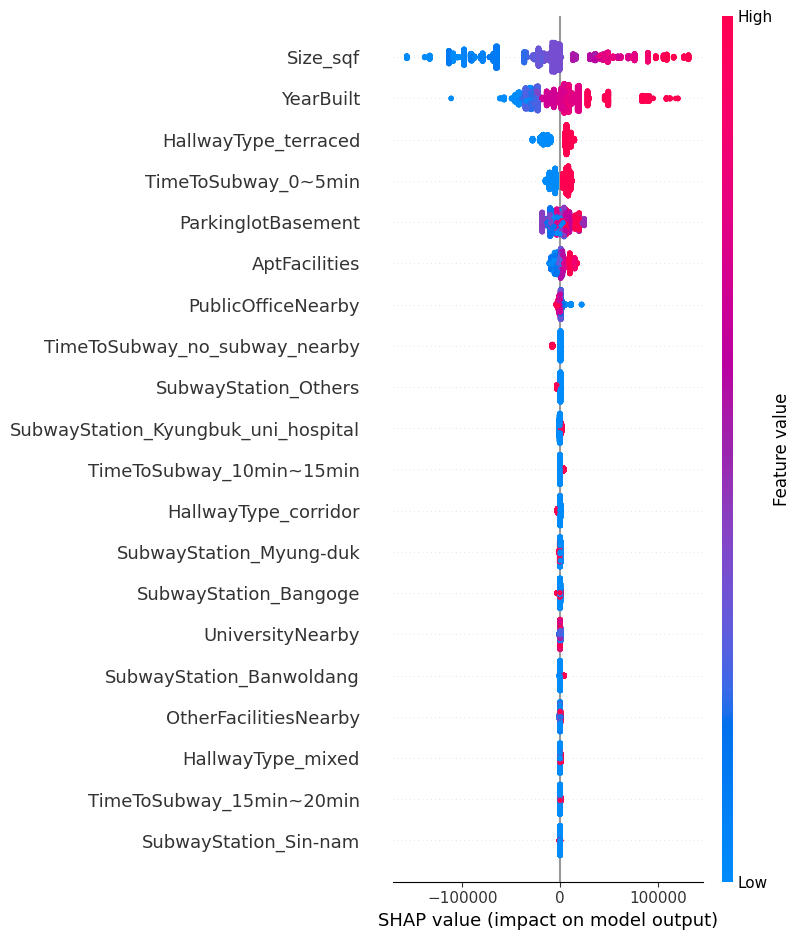

In [268]:
# summary plot for model in train
shap.summary_plot(
    shap_values,
    X_train_trans,
    feature_names=list_features
)

On the summary plot above, features are ordered by their average impact on prediction (SHAP value). However, we can also see how individual data points (dots) are affected by different feature values. Each dot represents a single observation in our dataset.

The horizontal axis  represents the SHAP value (impact on model output). The color of the dot indicates the value of the feature for that observation. Red indicates a higher value of the feature compared to other observations in the dataset, and blue indicates a lower value.

Here's an interpretation of the most impactful features:

- `Size` : larger size tends to lead to higher predicted sale price (positive impact).
- `YearBuilt` : newer buildings tend to lead to higher predicted sale price (positive impact).
- `HallwayType_terraced` : terraced hallways are associated with higher predicted sale price (positive impact).
- `Parkinglot(Basement)` : more parking spaces in the basement tend to lead to higher predicted sale price (positive impact).
- `TimeToSubway_0~5min` : proximity to a subway station (0-5 minutes) is associated with higher predicted sale price (positive impact).
- `AptFacilities` : more apartment facilities are associated with higher predicted sale price (positive impact).

### 6.4. Residuals (Error) Analysis

In machine learning, residuals represent the difference between the actual target values (Sale Price (USD) in this case) and the model's predicted values. A residual of zero signifies a perfect prediction. Positive residuals indicate that the model underestimated the actual sale price, while negative residuals indicate overestimation. Analyzing residuals is crucial for assessing the performance and limitations of a model.

#### Residual Visualization

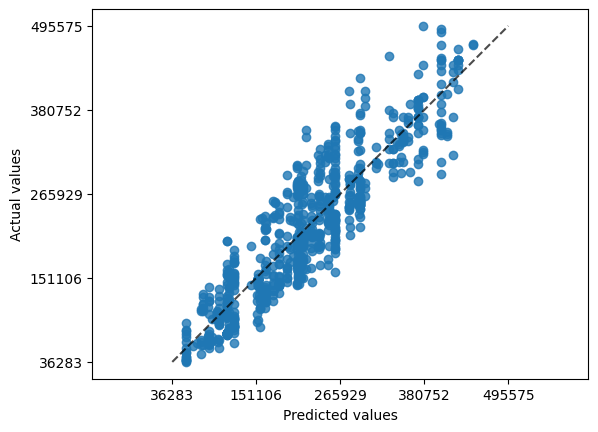

In [269]:
# make new dataframe for test data
test_df = X_test.copy()
test_df['SalePrice(USD)'] = y_test.tolist()

# make new column for y_pred
test_df['Prediction'] = y_pred_XGB_tuned_test.tolist() 

# calculate residual and make new column
test_df['Residual'] = abs(test_df['SalePrice(USD)'] - test_df['Prediction'])
test_df['% Residual'] = test_df['Residual']/test_df['SalePrice(USD)']*100

# create visualization of actual and predicted sale price
resid = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_XGB_tuned_test)
resid.plot(kind="actual_vs_predicted")
plt.show()

The graph show that majority of the points are clustered around the diagonal line, indicating that the model is performing well for most data points. Some data points are significantly distant from the diagonal line, suggesting there are instances where the model's predictions are less accurate. 

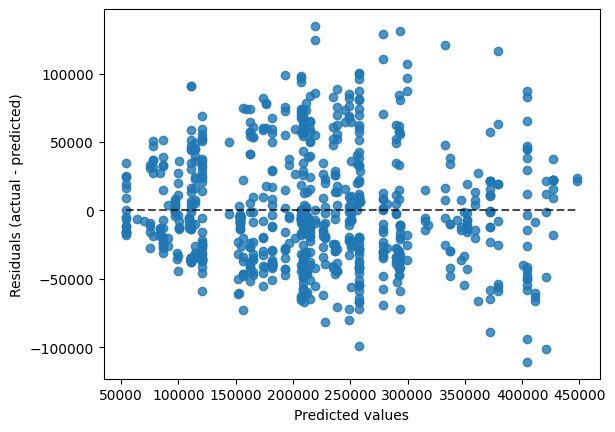

In [270]:
# create visualization of residual and predicted data
resid.plot(kind="residual_vs_predicted")
plt.show()

The residuals are scattered around zero, which is a positive sign. This indicates that the model's errors (differences between predicted and actual sale prices) are not consistently biased towards over-prediction or under-prediction across the entire range of predicted values.

However, as the predicted sale price increases, the residuals also tend to increase slightly in a non-linear fashion. This can suggest a heteroscedasticity, meaning the variance of the errors is not constant across all predicted values. So, the model's errors tend to be larger for higher predicted sale prices.

#### Model Performance by Residual

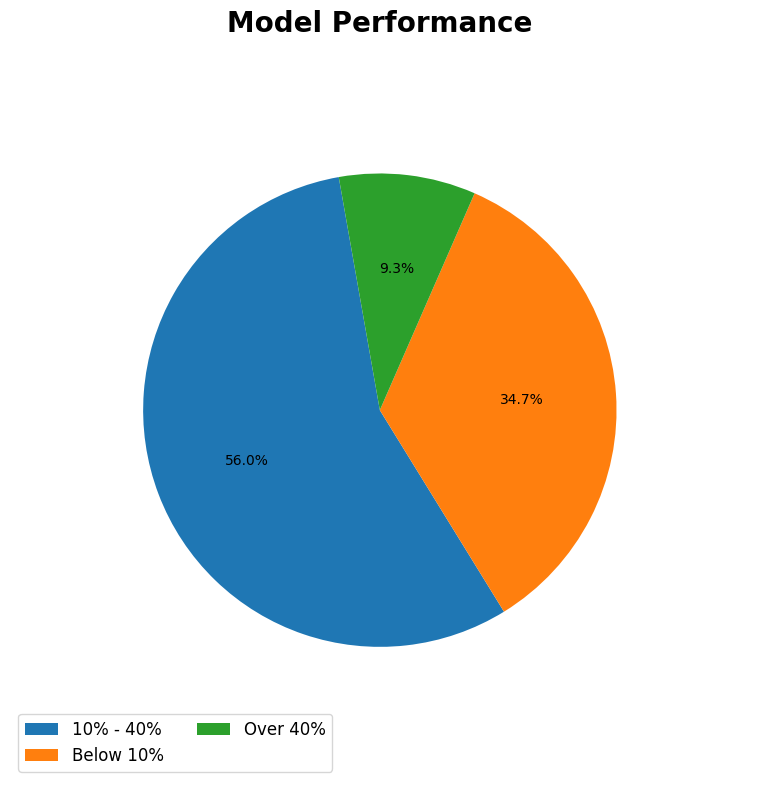

In [271]:
# visualize the proportion of model performance
def performance(x):
    if x <= 10:
        return 'Below 10%'
    elif 10 < x < 40:
        return '10%-40%'
    else:
        return 'Over 40%'

test_df['Residual'] = test_df['% Residual'].apply(performance)

labels = ['10% - 40%', 'Below 10%', 'Over 40%']

# create a pie chart
plt.figure(figsize=(10,8))
plt.pie(data=test_df, x=test_df['Residual'].value_counts(),autopct='%.1f%%',startangle=100,radius=0.8)

plt.title('Model Performance', fontsize=20, fontweight='bold')
plt.legend(labels, ncol=2, loc="lower left", frameon=True, prop={"size": 12})
plt.tight_layout()
plt.show()

While the final model performs well for a majority of predictions, as evidenced by the pie chart, there's still room for improvement. A small percentage (9.3%) of residuals exceed 40%, indicating that the model's errors are quite large for a few data points. This highlights a limitation of the current model in predicting these specific cases.

#### Advance Analysis

To create a more informative baseline price guide for the KFTC, we'll leverage the model's top features and incorporate predicted price.

**Binning by Size and Year Built :**

- Category for apartment size :

    - Type 1 = 206-409 sqf for a single person 
    - Type 2 = 409-538 sqf for 2 people (couples)
    - Type 3 = 538-753 sqf for a family of 3
    - Type 4 = 753-1928 sqf

- Category for year built :

    - 1976-1985 
    - 1986-1995 
    - 1996-2005
    - 2006-2015 

To create a more informative baseline price guide for the KFTC, we'll leverage the model's top features, including apartment size and year built, and incorporate predicted price ranges.

**Binning by Size and Year Built:**

- Category for apartment size (Source : https://apts.jp/tokyo-life/japanese-apartment-size-guide-with-diagrams/) :
    1. Between 206-406 sqf (suitable for singles)
    2. Between 409-538 sqf (suitable for couples)
    3. Between 538-753 sqf (suitable for families of 3)
    4. Between 753-1928 sqf (larger apartments)

- Category for year built by data availability :
    1. 1976-1985
    2. 1986-1995
    3. 1996-2005
    4. 2006-2015

In [272]:
# categorize apartment Year Built
def year_cat(x):
    if x <= 1985:
        return '1976-1985'
    elif 1985 < x <= 1995:
        return '1986-1995'
    elif 1995 < x <= 2005:
        return '1996-2005'
    else:
        return '2006-2015'

test_df['YearBuilt'] = test_df['YearBuilt'].apply(year_cat)

In [274]:
# categorize apartment Size
def size_cat(x):
    if x < 409:
        return '206-409 sqf'
    elif 409 <= x < 537:
        return '409-537 sqf'
    elif 538 <= x < 753:
        return '538-753 sqf'
    else:
        return '753-1928 sqf'

test_df['Size Category'] = test_df['Size_sqf'].apply(size_cat)

In [275]:
# data apartment with 'HallwayType_terraced' & 'TimeToSubway_0~5min'
apt_terraced = test_df[(test_df['HallwayType']=='terraced') & (test_df['TimeToSubway']=='0~5min')]

In [276]:
grouped = apt_terraced.groupby(by=['YearBuilt','Size Category'])['Prediction'].median()

In [293]:
grouped = pd.DataFrame(grouped)

# add new column for price range using the final model MAPE
grouped['lower'] = grouped['Prediction'] - (grouped['Prediction']*mape_XGB_test)
grouped['upper'] = grouped['Prediction'] + (grouped['Prediction']*mape_XGB_test)

print('Price Range for Apartment Terraced with 0-5 min Time to Subway')
grouped

Price Range for Apartment Terraced with 0-5 min Time to Subway


Prediction          lower          upper
YearBuilt Size Category                                             
1976-1985 538-753 sqf     69768.148438   56814.937530   82721.359345
          753-1928 sqf   100694.335938   81999.344028  119389.327847
2006-2015 409-537 sqf    109256.242188   88971.639834  129540.844541
          538-753 sqf    153837.937500  125276.261511  182399.613489
          753-1928 sqf   289537.937500  235782.089680  343293.785320

In [290]:
# merge the DataFrames based on YearBuilt and Size Category
merged_df = pd.merge(apt_terraced, grouped, how='left', left_on=['YearBuilt', 'Size Category'], right_on=['YearBuilt', 'Size Category'])

# check if SalePrice(USD) falls within the lower and upper price range
merged_df['WithinRange'] = merged_df.apply(lambda row: row['lower'] <= row['SalePrice(USD)'] <= row['upper'], axis=1)

# calculate the % difference based on conditions
def calculate_difference(row):
    if row['SalePrice(USD)'] < row['lower']:
        return (row['SalePrice(USD)'] - row['lower'])/row['lower']*100
    elif row['SalePrice(USD)'] > row['upper']:
        return (row['SalePrice(USD)'] - row['upper'])/row['upper']*100
    else:
        return 0

merged_df['Difference'] = merged_df.apply(calculate_difference, axis=1)

# show only the rows where the SalePrice(USD) is not within the range
result = merged_df[~merged_df['WithinRange']]

In [294]:
# profit
print('Mean Profit in %')
profit = result[result['Difference'] > 0]
profit['Difference'].mean()

Mean Profit in %


17.33714158780072

In [295]:
# loss
print('Mean Loss in %')
loss = result[result['Difference'] < 0]
loss['Difference'].mean()

Mean Loss in %


-13.540397816565644

Sale Price Prediction for Terraced Apartments (Time to Subway 0-5 min) :

1. Size between 538-753 sqf that built in 1976-1985 can have price range $56,814.93 USD - $82,721.35 USD. 
2. Size > 753 sqf that built in 1976-1985 can have price range $81,999.34 USD - $119,389.32 USD
3. Size between 409-537 sqf that built in 2006-2015 can have price range $88,971.63 USD - $129,540.84 USD
4. Size between 538-753 sqf	that built in 2006-2015 can have price range $125,276.26 USD - $182,399.61 USD
5. Size between > 753 sqf that built in 2006-2015 can have price range $235,782.08 USD - $343,293.781 USD

Based on the price range, we found that sellers of apartments in Daegu experience losses around 13% or profits around 17%.

### 6.5. Model Limitation

1. This final model can predict sale prices for apartments within the following ranges observed in the training data:
    - Other Facilities Nearby amount between  0 - 5 facilities (beside public office and university).
    - Public Office Nearby amount between 0 - 7 public offices.
    - University Nearby amount between 0 - 5 universities.
    - Parkinglot(Basement) between 0 - 1270 parking lots.
    - Year Built between 1978 - 2015.
    - Apt Facilities between 2 - 10 amenities.
    - Size(sqf) between 206 - 1928 square feet.

2. The model's predictions might be less reliable for apartments with features outside the observed ranges (e.g., an apartment built before 1978 or with more than 10 facilities). 
3. The model's accuracy depends on how well the training data reflects the actual market conditions. 
4. The model only considers the features provided. Other factors not included in the model (e.g., apartment condition, neighborhood amenities) can also significantly impact sale price.

### 6.6. Save Final Model

In [278]:
# Save model
pickle.dump(final_model, open('DaeguApartment_Final_XGB.sav', 'wb'))

#### Predict New Data

In [279]:
# Load model
filename = 'DaeguApartment_Final_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [280]:
# show final model
loaded_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMax', MinMaxScaler(),
                                                  ['PublicOfficeNearby',
                                                   'UniversityNearby',
                                                   'OtherFacilitiesNearby',
                                                   'ParkinglotBasement',
                                                   'YearBuilt', 'AptFacilities',
                                                   'Size_sqf']),
                                                 ('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'SubwayStation',
                                                   'TimeToSubway'])])),
                ('model',
                 XGBRegressor(base_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              loss='huber', max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3,
                              max_features='sqrt', max_leaves=None,
                              min_child_weight=None, min_samples_leaf=2,
                              min_samples_split=5, missing=nan,
                              monotone_constraints=None, multi_strategy=None, ...))])

In [281]:
feature_imp

,Feature,Importance
9,HallwayType_terraced,0.603002
16,TimeToSubway_0~5min,0.262197
6,Size_sqf,0.040994
4,YearBuilt,0.028690
3,ParkinglotBasement,0.023618
5,AptFacilities,0.011055
7,HallwayType_corridor,0.009717
10,SubwayStation_Bangoge,0.003780
20,TimeToSubway_no_subway_nearby,0.002665
11,SubwayStation_Banwoldang,0.002328


In [284]:
# create new observation
new = pd.DataFrame({
    'HallwayType' : ['terraced','mixed'],
    'TimeToSubway' : ['0~5min','10min~15min'],
    'SubwayStation' : ['Kyungbuk_uni_hospital','Myung-duk'],
    'OtherFacilitiesNearby' : [2,0],
    'PublicOfficeNearby' : [2,0],
    'UniversityNearby' : [2,0],
    'ParkinglotBasement' : [100,0],
    'YearBuilt' : [2006,1976],
    'AptFacilities' : [2,0],
    'Size_sqf' : [1000,206]}
)
new

,HallwayType,TimeToSubway,SubwayStation,OtherFacilitiesNearby,PublicOfficeNearby,UniversityNearby,ParkinglotBasement,YearBuilt,AptFacilities,Size_sqf
0,terraced,0~5min,Kyungbuk_uni_hospital,2,2,2,100,2006,2,1000
1,mixed,10min~15min,Myung-duk,0,0,0,0,1976,0,206


In [285]:
# predict new obervation
pd.DataFrame({'Prediction' : loaded_model.predict(new)})

,Prediction
0,234624.234375
1,63837.218750


## **7. Conclusion and Recommendation**
---

### 7.1. Conclusion

1. Our investigation revealed that a **XGBoost model after tuning** is the most effective for predicting apartment sale prices in Daegu. This final model achieved evaluation metrics value below :

    | **Final Model** | **Adj R2 Score** | **RMSE Score** | **MAPE Score** |
    | --- | --- | --- | --- |
    | XGBoost tuned | 0.822205 | 41628.674035 | 0.185661 |

    Adjusted R-squared score of 0.82, indicating a strong positive relationship between the predicted and actual sale prices.The Root Mean Squared Error (RMSE) score of $41,628.67 falls within an acceptable range for apartment price predictions between **$32,743 USD - $495,575 USD**, and the Mean Absolute Percentage Error (MAPE) score of 0.1856 suggests an average error of 18.56% between predicted and actual prices. While the model has limitations, it offers a significant advantage over traditional methods.

2. Feature analysis identified **Size, Year Built, HallwayType_terraced, and Time to Subway 0-5 min** as the most significant factors influencing apartment sale price. This aligns with market expectations, where larger and newer apartments command higher prices (also supported by this project's EDA section). Additionally, the high impact of HallwayType_terraced suggests a strong demand for this specific type of apartment in Daegu, potentially influencing sale prices.

3. The KFTC can focus on investigating whether this high demand is leading to unusual price fluctuations for **terraced apartments with a commute time to the subway of around 0-5 minutes** compared to other types. High demand can create opportunities for:
    - **Market Manipulation:** Developers or sellers might be artificially inflating prices due to the high demand.
    - **Buyers might be unaware of the "fair" price range** for terraced apartments, leading them to overpay due to limited information.

4. The prediction results can be used as a baseline for price ranges. For example, from our project's predictions, we can get price ranges for high-demand apartments (hallway type terraced and time to subway 0-5 minutes):

    | **Size Category** | **YearBuilt** | **Lower Price** | **Upper Price** |
    | --- | --- | --- | --- |
    | 538-753 sqf | 1976-1985 | $56,814.93 USD | $82,721.35 USD.|
    | > 753 sqf | 1976-1985 | $81,999.34 USD | $119,389.32 USD |
    | 409-537 sqf | 2006-2015 | $88,971.63 USD | $129,540.84 USD |
    | 538-753 sqf | 2006-2015 | $125,276.26 USD  | $182,399.61 USD|
    | > 753 sqf) | 2006-2015 | $235,782.08 USD | $343,293.781 USD |

Based on the price range, we found that sellers of apartments in Daegu experience **losses around 13%** or **profits around 17%**. By defining the base range, KFTC can help maintain fairness in property transaction. Furthermore, by using this data-driven price range, real estate agents can help their clients achieve fair market value and minimize the risk of underselling properties.

By using prediction model, we can get useful insight into the relationship between apartment characteristics and apartment prices. KFTC as main stakeholder can gain advantages because model can work faster and efficiently.

### 7.2. Recommendation

#### Recommendation for KFTC

1. The KFTC can utilize these predicted price ranges, along with the MAPE error range (18.56%), as a more **objective baseline for setting reasonable apartment sale price ranges in Daegu**, compared to solely relying on potentially subjective expert opinions or past trends.

2. Publishing **the established price range can increase market transparency**. This empowers buyers to compare asking prices to the data-driven baseline, potentially preventing them from being misled by inflated prices and fostering a fairer market environment.

3. Investigate whether this high demand is leading to unusual price fluctuations using the feature importance result.

#### Recommendation for real estate agent

Our model's predictions and price ranges can be valuable tools for real estate agents in Daegu. By utilizing this data-driven approach, agents can ensure they are buying and selling apartments at fair prices, potentially maximizing their profit while adhering to regulations established by the KFTC.

### 7.3. Future Considerations:

1. The dataset used for this project is limited to only 4,000 data points and 11 columns, which can resulted in bias and contribute to the model's error. It would be beneficial for future projects to incorporate more updated data for better prediction.

1. Based on the residual analysis, we can explore alternative models that can handle non-linear relationships better, such as Random Forests or Support Vector Machines (SVMs).

1. Future work can analyze the external factors that can affect apartment sale prices in Daegu, such as land price, taxes, tourist spot location, crime rates, and currency exchange rates.